# Business Understanding

## Motivation

Coupon marketing strategy has many benefits to help grow a business.

* Coupons can attract new customers and reactivate old customers.

* Coupons can make customers try new or related products. For example, many discounts are offered when a customer is subscribed (products being automatically purchased periodically) or buy more than a certain amount. 

* Provide great opportunities for advertising the business. As coupons are delivered by different sources such as mails, emails, or smart phone applications, customers receive and check advertisements delivered in order to receive a coupon. 

Knowing how much customers use coupons that are distributed by a campaign would be the first step to measure the effectiveness of the marketing strategy. Moreover, we would be able to design better campaign to improve sales. 


## About the dataset
The dataset that was used for this project was taken from [*kaggle*](https://www.kaggle.com/vasudeva009/predicting-coupon-redemption). The original goal of this dataset was to build a model and train it with the last 18 campaigns and predict the coupon redemption for the next 10 campaigns. However, I only used the train dataset with the 18 campaigns by splitting  it into the train and the test data to get evaluation scores for the test set. The main purpose of this project was to get the insights of what features influence customers to redeem coupons. 

The customers receive coupons during various campaigns though outlets like emails. The customers can redeem the given coupon for any valid items described in the *Coupon Item Mapping* within the duration between `start_date` and `end_date` in the *Campaign Data*. The *Customer Transaction Data* table saves the amount of discount by the coupon redemption or by other type of discounts and the *Train* (which is the train and the test sets for this project) saves the `coupon_id` and the `redemption_status`.  

### Dataset Description
The following schematic diagram from the kaggle site describe the relationships between the given 6 tables in the dataset. 
<img src='images/Schema.png' width="500">

You are provided with the following files:

1. **train.csv**: Train data containing the coupons offered to the given customers under the 18 campaigns

|Variable |Definition |
|:-- |:-- | 
|id |Unique id for coupon customer impression| 
|campaign_id | id for a discount campaign| 
|coupon_id | id for a discount coupon|
|customer_id |id for a customer|
|redemption_status| (target) (0 - Coupon not redeemed, 1 - Coupon redeemed) |

2. **campaign_data.csv**: Campaign information for each of the 28 campaigns

|Variable| Definition| 
|:--|:--|
|campaign_id |Unique id for a discount campaign|
|campaign_type |Anonymised Campaign Type (X/Y)|
|start_date |Campaign Start Date|
|end_date |Campaign End Date |


3. **coupon_item_mapping.csv**: Mapping of coupon and items valid for discount under that coupon

|Variable| Definition|
|:---|:---| 
|coupon_id |Unique id for a discount coupon (no order)| 
|item_id | id for items for which given coupon is valid (no order) |


4. **customer_demographics.csv**: Customer demographic information for some customers

|Variable |Definition|
|:---|:---|
|customer_id |Unique id for a customer|
|age_range |Age range of customer family in years|
|marital_status| Married/Single|
|rented| 0 - not rented accommodation, 1 - rented accommodation| |family_size| Number of family members|
|no_of_children |Number of children in the family|
|income_bracket| Label Encoded Income Bracket (Higher income corresponds to higher number) |

5. **customer_transaction_data.csv**: Transaction data for all customers for duration of campaigns in the train data

|Variable |Definition|
|:---|:---|
|date |Date of Transaction|
|customer_id| id for a customer|
|item_id| id for item|
|quantity |quantity of item bought|
|selling_price |Sales value of the transaction|
|other_discount| Discount from other sources such as manufacturer coupon/loyalty card|
|coupon_discount| Discount availed from retailer coupon |


6. **item_data.csv**: Item information for each item sold by the retailer

|Variable| Definition|
|:---|:---|
|item_id| Unique id for items|
|brand | id for item brand|
|brand_type |Brand Type (local/Established)| 
|category |Item Category |


7. ~~**test.csv**: Contains the coupon customer combination for which redemption status is to be predicted~~
    
    **Not used for this project**
    
|Variable| Definition|
|:---|:---|
|id |Unique id for coupon customer impression|
|campaign_id | id for a discount campaign|
|coupon_id | id for a discount coupon|
|customer_id |id for a customer |

# Importing Data/ Variables
## This is created for people who wants to get the data/variables without following every each process of creating them. 

In [ ]:
import pickle

In [203]:
tables_previous = pickle.load(open("tables.p","rb"))

In [204]:
tables_previous.keys()

dict_keys(['train', 'campaign', 'coupon', 'demog', 'transaction', 'transaction1', 'item', 'test', 'cust_trans', 'trans_item', 'cp_trans_item', 'cp_trans_item1', 'train_cp_trans_item', 'test_cp_trans_item', 'train_cp_trans_item_cust', 'test_cp_trans_item_cust', 'train_cp_trans_item_cust_camp', 'test_cp_trans_item_cust_camp'])

In [205]:
train = tables_previous['train'] 
campaign = tables_previous['campaign']
coupon = tables_previous['coupon']
demog = tables_previous['demog']
transaction = tables_previous['transaction'] 
transaction1 = tables_previous['transaction1']
item = tables_previous['item']


cust_trans = tables_previous['cust_trans']
trans_item = tables_previous['trans_item']

cp_trans_item = tables_previous['cp_trans_item']
cp_trans_item1 = tables_previous['cp_trans_item1']

train_cp_trans_item = tables_previous['train_cp_trans_item']
test_cp_trans_itemt = tables_previous['test_cp_trans_item']

train_cp_trans_item_cust = tables_previous['train_cp_trans_item_cust']

train_cp_trans_item_cust_camp = tables_previous['train_cp_trans_item_cust_camp']

In [206]:
import pickle
finals_previous= pickle.load( open("finals.p","rb"))

In [207]:
finals_previous.keys()

dict_keys(['test_final', 'train_final', 'X_reduced', 'removed_cols', 'y', 'SMOTE_ratio', 'X_train_resampled', 'y_train_resampled', 'X_test', 'y_test', 'scaled_X_train_resampled', 'scaled_X_test', 'X_outlier', 'y_outlier', 'X'])

# Importing libraries

In [44]:
#Basic tools
import pandas as pd
from datetime import datetime
import numpy as np

In [45]:
#train test split
from sklearn.model_selection import train_test_split


#function to get a mode of a dataset
from statistics import mode
#normalizing dataset
from sklearn.preprocessing import StandardScaler

#Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

#For resampling process to change the ratio of imbalanced ratio of the classes 
#testing various ratios
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
#resampling
from imblearn.over_sampling import SMOTE




In [46]:
train = pd.read_csv('train.csv')
campaign = pd.read_csv('campaign_data.csv')
coupon = pd.read_csv('coupon_item_mapping.csv')
demog = pd.read_csv('customer_demographics.csv')
transaction = pd.read_csv('customer_transaction_data.csv')
item = pd.read_csv('item_data.csv')

#### `tables` dictionary starts to save data here. 

In [47]:
#To update data and save them easily, a dictionary is created. 
tables ={}
tables['train'] = train
tables['campaign'] = campaign
tables['coupon'] = coupon 
tables['demog'] = demog
tables['transaction'] = transaction 
tables['item'] = item

# Exploratory Data Analysis

### Train Table

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
dtypes: int64(5)
memory usage: 3.0 MB


There are 18 campaigns.

In [49]:
len(train.campaign_id.unique())

18

In [50]:
train.redemption_status.value_counts()

0    77640
1      729
Name: redemption_status, dtype: int64

In [51]:
729/(77640+729)*100

0.930214753282548

There are only 0.93% coupon redemption so we will either oversample the class `Y` for coupon redemption, or under-sample class `N`   

Does each campaign have distinct set of coupons or do coupons overlap in different campaigns?

In [52]:
coupon_uses ={}
for cp in train.coupon_id.unique():
    # key = number of campaigns that use the coupon
    key = len(train[train.coupon_id==cp].campaign_id.unique())
    if key in coupon_uses.keys():
        #collect coupon ids that were used key times
        coupon_uses[key].append(cp)
    else:
        coupon_uses[key] = [cp]


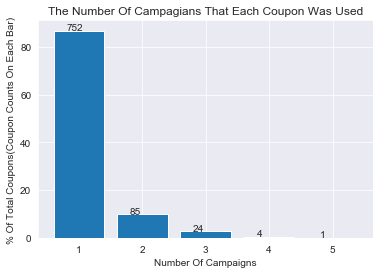

In [53]:
coupon_freq ={}
#coupon_freq 
#keys: the number of uses of coupons
#values:number of coupons 
for key in coupon_uses.keys():
    coupon_freq[key]= len(coupon_uses[key])/len(train.coupon_id.unique())*100

plt.bar(coupon_freq.keys(),coupon_freq.values())

# Text on the top of each barplot
label = [len(x) for x in coupon_uses.values()]
x_loc = np.array([x for x in coupon_freq.keys()])-0.2
y_loc = np.array([x for x in coupon_freq.values()]) + 0.1
for i in range(5):
    plt.text(x = x_loc[i] , y = y_loc[i], s = label[i], size = 10)
plt.title('The number of campagians that each coupon was used'.title())
plt.ylabel('% of total coupons(coupon counts on each bar)'.title())
plt.xlabel('number of campaigns'.title())
plt.show()

The answer is No... But most of coupons used only once for a particular campaign.

### Campaign Data Table

In [54]:
campaign.campaign_type.value_counts()

Y    22
X     6
Name: campaign_type, dtype: int64

There are 22 of Y type campaigns and 6 of X type campaigns. 

In [55]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int64
campaign_type    28 non-null object
start_date       28 non-null object
end_date         28 non-null object
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


In [56]:
len(campaign.campaign_id.unique())

28

There are 28 campaigns. 

In [57]:
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
coupon_id    92663 non-null int64
item_id      92663 non-null int64
dtypes: int64(2)
memory usage: 1.4 MB


### Coupon Item Mapping Table

In [58]:
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92663 entries, 0 to 92662
Data columns (total 2 columns):
coupon_id    92663 non-null int64
item_id      92663 non-null int64
dtypes: int64(2)
memory usage: 1.4 MB


In [59]:
coupon.coupon_id.value_counts()

32     11814
23     11813
22      4947
31      4873
33      4394
       ...  
764        1
99         1
752        1
493        1
53         1
Name: coupon_id, Length: 1116, dtype: int64

In [60]:
len(coupon.coupon_id.unique())

1116

In [61]:
len(coupon.item_id.unique())

36289

There are coupons that applied to multiple items like the coupon id 32. 

### Customer Demographics

In [62]:
demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [63]:
demog.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [64]:
demog.marital_status.value_counts()

Married    317
Single     114
Name: marital_status, dtype: int64

### Customer Transaction Data

In [65]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 7 columns):
date               1324566 non-null object
customer_id        1324566 non-null int64
item_id            1324566 non-null int64
quantity           1324566 non-null int64
selling_price      1324566 non-null float64
other_discount     1324566 non-null float64
coupon_discount    1324566 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 70.7+ MB


In [66]:
transaction.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [67]:
len(transaction[transaction.coupon_discount<0])

21286

In [68]:
21286/1303280

0.01633263765269167

There are 1.6% of transactions that received coupon discounts. 

In [69]:
len(train)+len(test)-len(transaction)

-1195971

The transaction has more data than both Train and Test data combined.

From below, the transaction history intersect some of the campaigns that we are dealing with. 

In [70]:
transaction.sort_values('date',ascending=False)[:5]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
1322975,2013-07-03,110,25377,2,47.02,0.00,0.0
1323125,2013-07-03,208,30932,1,106.50,0.00,0.0
1323111,2013-07-03,208,11332,1,142.12,0.00,0.0
1323112,2013-07-03,208,13212,1,120.75,0.00,0.0
1323113,2013-07-03,208,14759,1,89.05,-6.77,0.0


In [72]:
campaign.sort_values('end_date',ascending=False)

,campaign_id,campaign_type,start_date,end_date
24,29,Y,08/10/12,30/11/12
8,17,Y,29/07/13,30/08/13
26,27,Y,25/08/12,27/10/12
7,19,Y,26/08/13,27/09/13
12,12,Y,22/04/13,24/05/13
1,25,Y,21/10/13,22/11/13
27,26,X,12/08/12,21/09/12
0,24,Y,21/10/13,20/12/13
5,22,X,16/09/13,18/10/13
4,21,Y,16/09/13,18/10/13


In [73]:
transaction.coupon_discount.unique()

array([    0.  ,   -35.62,   -14.25,   -26.71,   -21.02,   -19.59,
         -80.14,   -17.81,    -8.9 ,  -102.94,   -71.24,   -21.37,
         -10.69,   -12.47,  -178.1 ,  -106.86,   -53.43,   -35.26,
         -12.11,  -213.72,   -56.64,   -28.14,   -44.52,  -569.92,
         -53.07,   -62.33,   -49.87,   -37.4 ,   -24.93,   -32.06,
        -213.36,  -355.84,  -142.12,   -17.45,   -39.18,   -40.96,
        -142.48,  -109.71,    -7.12,   -88.69,  -427.44,   -45.95,
         -89.05,   -16.03,  -113.63,  -106.5 ,   -70.53,   -31.35,
         -58.77,  -117.55,   -60.2 ,   -78.36,  -128.23,   -23.51,
         -79.79,   -28.5 ,   -92.26,  -177.74,   -47.73,  -554.96,
         -27.07,    -5.34,  -498.32,   -90.83,  -108.64,   -95.11,
        -319.87,   -30.28,  -284.6 ,   -70.88,  -124.67,  -152.81,
         -60.55,  -356.2 ,   -91.9 ,  -512.57,  -113.27,  -184.16,
        -117.19,  -160.29,  -184.87,  -249.34,   -55.21,   -95.82,
         -42.74,  -195.55,   -97.96,   -94.39,   -23.15,   -27

### Item Data

In [74]:
item.head(5)

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [75]:
len(item.brand.unique())

5528

In [76]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
item_id       74066 non-null int64
brand         74066 non-null int64
brand_type    74066 non-null object
category      74066 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [77]:
item.category.value_counts()

Grocery                   32448
Pharmaceutical            24471
Natural Products           2533
Dairy, Juices & Snacks     2425
Skin & Hair Care           2244
Meat                       2080
Packaged Meat              1966
Prepared Food              1880
Bakery                     1679
Seafood                     728
Flowers & Plants            664
Miscellaneous               385
Alcohol                     303
Garden                      102
Restauarant                  78
Salads                       40
Travel                       19
Fuel                         14
Vegetables (cut)              7
Name: category, dtype: int64

# Data Preparation

## Missing values

In [79]:
for i in range(len(train.columns)):
    print(train.columns[i],'\n')
    print(train[train.columns[i]].unique(),'\n')

id 

[     1      2      6 ... 128590 128592 128595] 

campaign_id 

[13  9  8 11 29 30  2  5 12 26  3  4 10  7 28 27  6  1] 

coupon_id 

[  27  116  635  644 1017  795  444  538  857  559  575 1028  705  517
  893  796  506  689  268    8  674  320  109  278 1031  326  363  911
  383  482  813  118  663  332  500  757 1067   87  905 1114  152   57
  271  413  582  333  485  256  980  700  628  136  750  854  761  828
  881  129  867  709  169 1083  530  822  126  917   22  960   24  772
  603  982  510  132   60 1063  166  679  839  459  658  106  168  473
  627  145    7  667  924  621  467  985  171 1056  890  920  279  948
  368  107   19  800  420  756  783  687  913  725  483  275  788  170
   14  416   54  113  125  902  526  144  554  936  971  872  873  643
  433  131  591  608  723   76  696  544  148   97  819  673  123  490
   55  989   83  437  836  806  891  870  542   64  646  566  520  910
  581  537  656  996 1012  759 1044  616  883  754  430  786  694  119
  481  94

In [80]:
for i in range(len(campaign.columns)):
    print(campaign.columns[i],'\n')
    print(campaign[campaign.columns[i]].unique(),'\n')

campaign_id 

[24 25 20 23 21 22 18 19 17 16 13 11 12 10  9  8  7  6  3  5  4  1  2 30
 29 28 27 26] 

campaign_type 

['Y' 'X'] 

start_date 

['21/10/13' '07/09/13' '08/10/13' '16/09/13' '10/08/13' '26/08/13'
 '29/07/13' '15/07/13' '19/05/13' '22/04/13' '08/04/13' '11/03/13'
 '16/02/13' '02/02/13' '28/01/13' '22/12/12' '12/01/13' '07/01/13'
 '12/12/12' '17/12/12' '19/11/12' '08/10/12' '16/09/12' '25/08/12'
 '12/08/12'] 

end_date 

['20/12/13' '22/11/13' '16/11/13' '15/11/13' '18/10/13' '04/10/13'
 '27/09/13' '30/08/13' '16/08/13' '05/07/13' '07/06/13' '24/05/13'
 '10/05/13' '12/04/13' '05/04/13' '08/03/13' '01/03/13' '16/02/13'
 '15/02/13' '08/02/13' '18/01/13' '04/01/13' '30/11/12' '16/11/12'
 '27/10/12' '21/09/12'] 



In [81]:
for i in range(len(coupon.columns)):
    print(coupon.columns[i],'\n')
    print(coupon[coupon.columns[i]].unique(),'\n')

coupon_id 

[105 107 494 ... 217 218 219] 

item_id 

[   37    75    76 ... 71965 67815 68920] 



In [82]:
for i in range(len(item.columns)):
    print(item.columns[i],'\n')
    print(item[item.columns[i]].unique(),'\n')

item_id 

[    1     2     3 ... 74064 74065 74066] 

brand 

[   1   56   11 ... 5463 2997 3360] 

brand_type 

['Established' 'Local'] 

category 

['Grocery' 'Miscellaneous' 'Bakery' 'Pharmaceutical' 'Packaged Meat'
 'Seafood' 'Natural Products' 'Dairy, Juices & Snacks' 'Prepared Food'
 'Skin & Hair Care' 'Meat' 'Travel' 'Flowers & Plants' 'Fuel' 'Salads'
 'Alcohol' 'Garden' 'Restauarant' 'Vegetables (cut)'] 



In [83]:
for i in range(len(demog.columns)):
    print(demog.columns[i],'\n')
    print(demog[demog.columns[i]].unique(),'\n')

customer_id 

[   1    6    7    8   10   11   12   13   14   15   17   19   22   27
   28   30   31   33   35   36   38   39   40   41   42   45   48   51
   52   53   55   58   59   66   67   69   71   72   74   75   78   79
   82   83   84   85   87   89   90   92   93   94   97  103  105  107
  108  110  112  113  114  119  123  124  128  131  132  134  135  136
  138  140  141  142  143  144  149  150  151  153  154  155  158  159
  161  162  163  167  168  174  178  179  180  185  186  189  191  192
  193  195  197  201  202  204  205  207  209  212  214  223  225  226
  227  228  230  231  232  235  238  239  242  243  245  246  248  249
  250  251  252  253  259  262  265  266  267  268  269  271  276  277
  279  281  283  284  286  287  288  292  293  294  295  297  298  300
  303  306  313  314  315  316  317  318  319  320  327  329  333  336
  338  339  343  347  348  349  352  353  355  357  361  363  367  368
  369  371  374  375  377  378  381  382  383  384  386  389  3

In [84]:
transaction.coupon_discount.unique()

array([    0.  ,   -35.62,   -14.25,   -26.71,   -21.02,   -19.59,
         -80.14,   -17.81,    -8.9 ,  -102.94,   -71.24,   -21.37,
         -10.69,   -12.47,  -178.1 ,  -106.86,   -53.43,   -35.26,
         -12.11,  -213.72,   -56.64,   -28.14,   -44.52,  -569.92,
         -53.07,   -62.33,   -49.87,   -37.4 ,   -24.93,   -32.06,
        -213.36,  -355.84,  -142.12,   -17.45,   -39.18,   -40.96,
        -142.48,  -109.71,    -7.12,   -88.69,  -427.44,   -45.95,
         -89.05,   -16.03,  -113.63,  -106.5 ,   -70.53,   -31.35,
         -58.77,  -117.55,   -60.2 ,   -78.36,  -128.23,   -23.51,
         -79.79,   -28.5 ,   -92.26,  -177.74,   -47.73,  -554.96,
         -27.07,    -5.34,  -498.32,   -90.83,  -108.64,   -95.11,
        -319.87,   -30.28,  -284.6 ,   -70.88,  -124.67,  -152.81,
         -60.55,  -356.2 ,   -91.9 ,  -512.57,  -113.27,  -184.16,
        -117.19,  -160.29,  -184.87,  -249.34,   -55.21,   -95.82,
         -42.74,  -195.55,   -97.96,   -94.39,   -23.15,   -27

In [85]:
transaction_cols = transaction.columns

In [86]:
transaction_cols

Index(['date', 'customer_id', 'item_id', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount'],
      dtype='object')

Sometimes, missing data values are filled with values that do not make sense as place holders instead of `NaN`. For example, we can check if there are positive value for discounts in transactions.  

In [87]:
any(transaction.coupon_discount>0)

False

In [88]:
any(transaction.other_discount>0)

False

In [89]:
any(transaction.selling_price<0)

False

After careful examinations, only table that we need to work on missing values is `demog`.

In [90]:
demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    431 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    222 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


Missing values in `marital_status` are filled with 'unknown'.

In [91]:
demog.marital_status.fillna('unknown', inplace = True)

Missing values in `no_of_children` are willed with '0'. 

In [92]:
demog.no_of_children.fillna('0', inplace = True)

In [93]:
demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null int64
age_range         760 non-null object
marital_status    760 non-null object
rented            760 non-null int64
family_size       760 non-null object
no_of_children    760 non-null object
income_bracket    760 non-null int64
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


No more missing values in `demog` data. 

In [94]:
tables['demog']= demog

## Change data types

### Campaign

#### Changing the data type of start_date and end_date to date time

In [95]:
def Change_to_datetime(date_col):
    new_datetype = []
    for i, date in enumerate(date_col):
        date_format = "%d/%m/%Y" 
    
        date= date[:-2]+'20'+date[-2:]#change the string format to the format convirtable to datetype object
        date= datetime.strptime(date, date_format)
        new_datetype.append(date)
        
    new_datetype = pd.Series(new_datetype)
    return new_datetype


In [96]:
campaign.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [97]:
end_date =Change_to_datetime(campaign.end_date)
campaign.end_date = end_date

In [98]:
start_date =Change_to_datetime(campaign.start_date)
campaign.start_date = start_date

In [99]:
campaign.end_date[0]

Timestamp('2013-12-20 00:00:00')

In [100]:
campaign.campaign_type.value_counts()

Y    22
X     6
Name: campaign_type, dtype: int64

#### Create a new feature: `campaign duration_days`

campaign's `duration_days` is the period in days that a campaign lasted.

In [101]:
func = lambda x: x.days
campaign['duration_days']=campaign.end_date - campaign.start_date
campaign['duration_days'] = campaign['duration_days'].apply(func)

In [102]:
campaign.columns

Index(['campaign_id', 'campaign_type', 'start_date', 'end_date',
       'duration_days'],
      dtype='object')

In [103]:
tables['campaign'] = campaign

In [104]:
campaign[campaign.campaign_type=='X']

,campaign_id,campaign_type,start_date,end_date,duration_days
5,22,X,2013-09-16,2013-10-18,32
6,18,X,2013-08-10,2013-10-04,55
10,13,X,2013-05-19,2013-07-05,47
15,8,X,2013-02-16,2013-04-05,48
23,30,X,2012-11-19,2013-01-04,46
27,26,X,2012-08-12,2012-09-21,40


In [105]:
campaign[campaign.campaign_type=='Y']

,campaign_id,campaign_type,start_date,end_date,duration_days
0,24,Y,2013-10-21,2013-12-20,60
1,25,Y,2013-10-21,2013-11-22,32
2,20,Y,2013-09-07,2013-11-16,70
3,23,Y,2013-10-08,2013-11-15,38
4,21,Y,2013-09-16,2013-10-18,32
7,19,Y,2013-08-26,2013-09-27,32
8,17,Y,2013-07-29,2013-08-30,32
9,16,Y,2013-07-15,2013-08-16,32
11,11,Y,2013-04-22,2013-06-07,46
12,12,Y,2013-04-22,2013-05-24,32


In [106]:
train.campaign_id.unique()

array([13,  9,  8, 11, 29, 30,  2,  5, 12, 26,  3,  4, 10,  7, 28, 27,  6,
        1], dtype=int64)

In [107]:
test.campaign_id.unique()

array([22, 20, 25, 17, 18, 21, 23, 19, 16, 24], dtype=int64)

### Transaction

Change the date column of transaction to the datetime type.

In [108]:
transaction.date = pd.to_datetime(transaction.date, yearfirst=True)

In [109]:
transaction.date[0]

Timestamp('2012-01-02 00:00:00')

# Creating aggregation tables: condensing information 

As shown in the EDA above, it is hard to get meaningful characteristics with each table alone. Customer Transaction Data(`transaction`) need to be aggregated to extract meaningful information as it does not have a primary key but has different types of ids that are used multiple times such as one value of `customer_id`appears in multiple rows in the table. 

## aggregating transactions by item_id as a table `transaction1`

In [110]:
transaction.head(5)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


Create two new columns for the transaction table.

* To count the number of transactions that a coupon was applied, `coupon_used` categorical variable is created. 
* To count the number of transactions by a feature such as customer_id or item_id, `count` column with entry value 1 is created. 

In [111]:
transaction['coupon_used']= transaction.coupon_discount.apply(lambda x:1 if x !=0 else 0)

In [112]:
transaction['count']=1

In [113]:
transaction['year_date']=transaction['date'].apply(lambda x: x.year)
transaction['month_date']=transaction['date'].apply(lambda x: x.month)
transaction['day_date']=transaction['date'].apply(lambda x: x.day)
transaction['dow_date']=transaction['date'].apply(lambda x: x.dayofweek)

In [114]:
transaction.head(5)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount,coupon_used,count,year_date,month_date,day_date,dow_date
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0,0,1,2012,1,2,0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0,0,1,2012,1,2,0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0,0,1,2012,1,2,0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0,0,1,2012,1,2,0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0,0,1,2012,1,2,0


Using `pandas.pivot_table`, transaction data on each item is aggregated. The aggregated Dataframe has 7 columns and each column is described as followed.

|name|Description|
|:---|:---|
| ct_cust_it | number of distinct customers that bought the item|
| avg_order_qnt_it  |average order quantity|
| avg_price_it | average selling price|
| avg_oth_dis_it | average amount of other discount|
|avg_cp_dis_it| average amount of coupon discount|
|ct_ord_it| number of orders made|
|sum_cp_used_it| number of coupon used|



In [115]:
transaction1 = pd.pivot_table(transaction, index = 'item_id',
               values = ['customer_id','quantity','selling_price',
                         'other_discount','coupon_discount','count','coupon_used'],
               aggfunc={'customer_id':lambda x:len(set(x)),
                        'quantity':np.mean,
                        'selling_price':np.mean,
                        'other_discount':np.mean,
                        'coupon_discount':np.mean,
                        'count':sum,
                        'coupon_used':sum
                       }
              )

In [116]:
new_cols = {'customer_id':'ct_cust_it',
            'quantity':'avg_order_qnt_it',
            'selling_price':'avg_price_it',
            'other_discount':'avg_oth_dis_it',
            'coupon_discount':'avg_cp_dis_it',
            'count':'ct_ord_it',
           'coupon_used':'sum_cp_used_it'}
transaction1.rename(columns=new_cols, inplace = True)

In [117]:
transaction1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74063 entries, 1 to 74066
Data columns (total 7 columns):
ct_ord_it           74063 non-null int64
avg_cp_dis_it       74063 non-null float64
sum_cp_used_it      74063 non-null int64
ct_cust_it          74063 non-null int64
avg_oth_dis_it      74063 non-null float64
avg_order_qnt_it    74063 non-null float64
avg_price_it        74063 non-null float64
dtypes: float64(4), int64(3)
memory usage: 4.5 MB


In [118]:
transaction1.ct_ord_it.value_counts()

1       27729
2        9255
3        5246
4        3419
5        2467
        ...  
423         1
743         1
1039        1
783         1
1087        1
Name: ct_ord_it, Length: 582, dtype: int64

In [119]:
transaction1.head(5)

,ct_ord_it,avg_cp_dis_it,sum_cp_used_it,ct_cust_it,avg_oth_dis_it,avg_order_qnt_it,avg_price_it
item_id,,,,,,,
1,2,0.0,0,2,0.0,1.0,124.31
2,1,0.0,0,1,0.0,1.0,35.26
3,1,0.0,0,1,0.0,1.0,56.64
4,1,0.0,0,1,0.0,1.0,54.85
5,1,0.0,0,1,0.0,1.0,81.57


Also we will add the couple of summed quantities of features.

|name|Description|
|:---|:---|
|sum_cp_dis_it|total amount of discount by coupons per item|
|sum_oth_dis_it| total amount of discount by other sources per item|
|sum_order_qnt_it|total amount of ordered quantity per item|
|sum_total_dis_it|total amount of discount by any sources per item|
|avg_total_dis_it|average amount of discount by any sources per item|


In [120]:
transaction1['sum_cp_dis_it'] = transaction1['avg_cp_dis_it']*transaction1['ct_ord_it']

In [121]:
transaction1['sum_oth_dis_it'] = transaction1['avg_oth_dis_it']*transaction1['ct_ord_it']

In [122]:
transaction1['sum_order_qnt_it']= transaction1['avg_order_qnt_it']*transaction1['ct_ord_it']

In [123]:
transaction1['sum_order_qnt_it'].unique()

array([  2.,   1.,   3., ..., 731., 788.,  80.])

In [124]:
transaction1['sum_total_dis_it'] = transaction1['sum_cp_dis_it'] +transaction1['sum_oth_dis_it']
transaction1['avg_total_dis_it'] = transaction1['avg_cp_dis_it'] +transaction1['avg_oth_dis_it']

#### Save `transaction1`

In [125]:
tables['transaction1']=transaction1

## Merge the aggregated transaction table on items (`transaction1`) with `item` table as `trans_item` 

In [126]:
transaction1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74063 entries, 1 to 74066
Data columns (total 12 columns):
ct_ord_it           74063 non-null int64
avg_cp_dis_it       74063 non-null float64
sum_cp_used_it      74063 non-null int64
ct_cust_it          74063 non-null int64
avg_oth_dis_it      74063 non-null float64
avg_order_qnt_it    74063 non-null float64
avg_price_it        74063 non-null float64
sum_cp_dis_it       74063 non-null float64
sum_oth_dis_it      74063 non-null float64
sum_order_qnt_it    74063 non-null float64
sum_total_dis_it    74063 non-null float64
avg_total_dis_it    74063 non-null float64
dtypes: float64(9), int64(3)
memory usage: 7.3 MB


In [127]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
item_id       74066 non-null int64
brand         74066 non-null int64
brand_type    74066 non-null object
category      74066 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [128]:
trans_item = pd.merge(transaction1, item, on = 'item_id', how ='left')

In [129]:
trans_item.head()

,item_id,ct_ord_it,avg_cp_dis_it,sum_cp_used_it,ct_cust_it,avg_oth_dis_it,avg_order_qnt_it,avg_price_it,sum_cp_dis_it,sum_oth_dis_it,sum_order_qnt_it,sum_total_dis_it,avg_total_dis_it,brand,brand_type,category
0,1,2,0.0,0,2,0.0,1.0,124.31,0.0,0.0,2.0,0.0,0.0,1,Established,Grocery
1,2,1,0.0,0,1,0.0,1.0,35.26,0.0,0.0,1.0,0.0,0.0,1,Established,Miscellaneous
2,3,1,0.0,0,1,0.0,1.0,56.64,0.0,0.0,1.0,0.0,0.0,56,Local,Bakery
3,4,1,0.0,0,1,0.0,1.0,54.85,0.0,0.0,1.0,0.0,0.0,56,Local,Grocery
4,5,1,0.0,0,1,0.0,1.0,81.57,0.0,0.0,1.0,0.0,0.0,56,Local,Grocery


#### Save `trans_item`

In [130]:
tables['trans_item'] = trans_item

## Merge `coupon` with `trans_item` as `cp_trans_item` 

In [131]:
cp_trans_item = pd.merge(coupon, trans_item, on= 'item_id', how = 'left')

#### Save `cp_trans_item`

In [132]:
tables['cp_trans_item']= cp_trans_item

## Aggregating `cp_trans_item` on `coupon_id`

As Train table does not include information about items, `cp_trans_item`, which is the merged table between Coupon Item Mapping and aggregated Customer Transaction Data by item_id, needs to be aggregated again by coupon_id to be used as features in Train table.  

### Rename columns of `cp_trans_item`

Since each aggregated features will be aggregated again by coupon_id, the name at the end `_it` indicating `by item` will be removed. 

In [133]:
cols = list(cp_trans_item.columns)
for i, col in enumerate(cols):
    if col[-3:] =='_it':
        cols[i] = col[:-3]

cp_trans_item.columns = pd.Index(cols)

In [134]:
cp_trans_item.head()

,coupon_id,item_id,ct_ord,avg_cp_dis,sum_cp_used,ct_cust,avg_oth_dis,avg_order_qnt,avg_price,sum_cp_dis,sum_oth_dis,sum_order_qnt,sum_total_dis,avg_total_dis,brand,brand_type,category
0,105,37,7.0,0.0,0.0,2.0,-17.557143,2.285714,113.120000,0.0,-122.90,16.0,-122.90,-17.557143,56.0,Local,Grocery
1,107,75,33.0,0.0,0.0,4.0,-5.159394,1.363636,47.787273,0.0,-170.26,45.0,-170.26,-5.159394,56.0,Local,Grocery
2,494,76,1.0,0.0,0.0,1.0,-17.450000,1.000000,89.050000,0.0,-17.45,1.0,-17.45,-17.450000,209.0,Established,Grocery
3,522,77,2.0,0.0,0.0,2.0,-16.920000,1.000000,70.350000,0.0,-33.84,2.0,-33.84,-16.920000,278.0,Established,Grocery
4,518,77,2.0,0.0,0.0,2.0,-16.920000,1.000000,70.350000,0.0,-33.84,2.0,-33.84,-16.920000,278.0,Established,Grocery


#### Save `cp_trans_item`

In [135]:
tables['cp_trans_item']=cp_trans_item

### Aggregating `cp_trans_item` on `coupon_id` as `cp_trans_item1` 

Using `pandas.pivot_table`, `cp_trans em` is aggregated by `coupon_id`. The aggregated columns are defined as followed.

|name|Description|
|:---|:---|
| ct_cust  | number of distinct customers that bought the item|
| avg_order_qnt   |average order quantity|
| avg_price  | average selling price|
| avg_oth_dis  | average amount of other discount|
|avg_cp_dis | average amount of coupon discount|
|ct_ord | number of orders made|
|sum_cp_used | number of coupon used|
|sum_cp_dis |total amount of discount by coupons per coupon|
|sum_oth_dis | total amount of discount by other sources per coupon|
|sum_order_qnt |total amount of ordered quantity per coupon|
|sum_total_dis |total amount of discount by any sources per coupon|
|avg_total_dis |average amount of discount by any sources per coupon|
|ct ems| number of items applied by the coupon|
|ct_brands| number of brands applied by the coupon|
|mode_cat| most frequent category covered by the coupon|
|ct_cat| number of categories covered by coupon|

In [136]:
cp_trans_item1 = pd.pivot_table(cp_trans_item, index ='coupon_id',
                                values=['item_id', 'coupon_id', 'brand', 'brand_type', 'category', 'ct_ord',
                                        'avg_cp_dis', 'sum_cp_used', 'ct_cust', 'avg_oth_dis', 'avg_order_qnt',
                                       'avg_price', 'sum_cp_dis', 'sum_oth_dis', 'sum_order_qnt',
                                       'sum_total_dis', 'avg_total_dis'],
                               aggfunc={
                                   'item_id': lambda x: len(set(x)),
                                   'brand': lambda x: len(set(x)),
                                   'brand_type': lambda x: x.unique()[0] if (len(x.unique())==1) else 'Both',
                                   'category':lambda x: x.mode()[0],
                                   'ct_ord': np.sum,
                                   'avg_cp_dis':np.mean,
                                   'sum_cp_used':np.sum,
                                   'ct_cust':np.sum,
                                   'avg_oth_dis':np.mean,
                                   'avg_order_qnt':np.mean,
                                   'ct_ord':np.sum,
                                   'avg_price':np.mean,
                                   'sum_cp_dis':np.sum,
                                   'sum_oth_dis':np.sum,
                                   'sum_order_qnt':np.sum,
                                   'sum_total_dis':np.sum,
                                   'avg_total_dis':np.mean
                               }
                              )

new_cols= {
                   'item_id': 'ct_items',#item count
                   'brand': 'ct_brands',
                   'category':'mode_cat'
    
                                  }
cp_trans_item1.rename(columns = new_cols, inplace = True)

In [139]:
cp_trans_item1['ct_cat']= pd.pivot_table(cp_trans_item, 
                                         index='coupon_id',
                                         values ='category',
                                         aggfunc =lambda x: len(set(x)))

In [140]:
cp_trans_item1.head()

,avg_cp_dis,avg_order_qnt,avg_oth_dis,avg_price,avg_total_dis,ct_brands,brand_type,mode_cat,ct_cust,ct_ord,ct_items,sum_cp_dis,sum_cp_used,sum_order_qnt,sum_oth_dis,sum_total_dis,ct_cat
coupon_id,,,,,,,,,,,,,,,,,
1,-1.321524,1.221644,-25.273218,100.195701,-26.594742,3.0,Established,Natural Products,577.0,826.0,39,-1526.31,35.0,1034.0,-24468.37,-25994.68,2
2,0.000000,1.137500,-23.314062,114.354438,-23.314062,1.0,Established,Grocery,30.0,81.0,2,0.00,0.0,103.0,-1478.75,-1478.75,1
3,-2.747358,1.121525,-17.543797,129.981640,-20.291155,2.0,Established,Grocery,146.0,212.0,17,-578.81,15.0,248.0,-4952.62,-5531.43,1
4,-1.485152,1.020872,-37.411408,178.722897,-38.896560,1.0,Established,Grocery,536.0,676.0,24,-881.59,44.0,702.0,-26804.05,-27685.64,1
5,0.000000,1.000000,-27.265786,376.704214,-27.265786,1.0,Established,Pharmaceutical,42.0,44.0,7,0.00,0.0,44.0,-1228.88,-1228.88,1


#### Save `cp_trans_item1` :Aggregated `cp_trans_item` on `coupon_id`

In [141]:
tables['cp_trans_item1']= cp_trans_item1

## Combine `cp_trans_item1` with `train` and `test`

### Combined train data:`train_cp_trans_item`

In [142]:
train_cp_trans_item = pd.merge(train, cp_trans_item1, on = 'coupon_id', how= 'left')
train_cp_trans_item.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,avg_cp_dis,avg_order_qnt,avg_oth_dis,avg_price,avg_total_dis,...,mode_cat,ct_cust,ct_ord,ct_items,sum_cp_dis,sum_cp_used,sum_order_qnt,sum_oth_dis,sum_total_dis,ct_cat
0,1,13,27,1053,0,-1.241694,1.169768,-51.732305,84.478583,-52.974000,...,Grocery,2403.0,3713.0,125,-5349.93,191.0,4661.0,-225584.38,-230934.31,1
1,2,13,116,48,0,0.000000,1.050926,-10.661343,63.833519,-10.661343,...,Grocery,61.0,75.0,3,0.00,0.0,86.0,-684.27,-684.27,1
2,6,9,635,205,0,-2.987321,1.353802,-142.498493,332.128380,-145.485813,...,Pharmaceutical,118.0,142.0,67,-605.54,15.0,202.0,-23566.35,-24171.89,1
3,7,13,644,1050,0,-4.452500,1.110390,-5.010601,94.261640,-9.463101,...,Grocery,14.0,39.0,4,-17.81,1.0,47.0,-309.91,-327.72,1
4,9,8,1017,1489,0,-0.198055,1.071044,-33.629121,181.621631,-33.827176,...,Grocery,874.0,1420.0,32,-569.92,23.0,1610.0,-54950.74,-55520.66,1


### Save `train_cp_trans_item` in tables

In [143]:
tables['train_cp_trans_item']= train_cp_trans_item

### Combined train data:`test_cp_trans_item`

In [144]:
test_cp_trans_item = pd.merge(test, cp_trans_item1, on = 'coupon_id', how= 'left')
test_cp_trans_item.head()

,id,campaign_id,coupon_id,customer_id,avg_cp_dis,avg_order_qnt,avg_oth_dis,avg_price,avg_total_dis,ct_brands,...,mode_cat,ct_cust,ct_ord,ct_items,sum_cp_dis,sum_cp_used,sum_order_qnt,sum_oth_dis,sum_total_dis,ct_cat
0,3,22,869,967,-0.738141,1.130381,-33.151283,121.869253,-33.889424,1.0,...,Grocery,1469.0,3655.0,72,-2288.55,59.0,4162.0,-149498.63,-151787.18,1
1,4,20,389,1566,-1.997622,1.038477,-19.140945,152.155685,-21.138566,3.0,...,Pharmaceutical,435.0,676.0,33,-1243.08,36.0,731.0,-13059.73,-14302.81,1
2,5,22,981,510,-0.703917,1.205491,-15.986070,106.042197,-16.689987,1.0,...,Grocery,729.0,1307.0,19,-2518.38,107.0,1495.0,-16222.50,-18740.88,1
3,8,25,1069,361,-0.928593,1.029157,-69.994211,117.221098,-70.922804,1.0,...,Grocery,1387.0,2042.0,74,-1351.66,47.0,2138.0,-152001.54,-153353.20,1
4,10,17,498,811,-4.866115,1.109998,-10.645171,115.711670,-15.511287,1.0,...,Grocery,350.0,567.0,18,-1729.35,84.0,619.0,-5385.60,-7114.95,1


### Save `test_cp_trans_item` in tables

In [145]:
tables['test_cp_trans_item']= test_cp_trans_item

## Aggregating `transaction` on `customer_id` as a table `cust_trans`

Using `pandas.pivot_table`, `transaction` is aggregated by `customer_id`. The aggregated columns are defined similar to the aggregations by `coupon_id` so the description of most columns can be referred to the previous section. The one distinct featured column introduced in this process is: 

|name|Description|
|:---|:---|
|ct_cp_use_cust|the number of coupons used per customer|

The column names on this table will have `_cust` to differentiate from the columns of the other aggregated tables above.


In [146]:
cust_trans = pd.pivot_table(transaction, index = 'customer_id',
                           values =['item_id', 'quantity', 'selling_price',
                                    'other_discount','coupon_discount','count','coupon_used'],
                           aggfunc={'item_id':len, 
                                    'quantity':np.mean,
                                    'selling_price':np.mean,
                                    'other_discount':np.mean,
                                    'coupon_discount':np.mean,
                                   'coupon_used':np.mean})
new_cols={'item_id':'ct_items_cust',
          'quantity':'avg_qnt_cust',
          'selling_price':'avg_price_cust',
          'other_discount':'avg_oth_disc_cust',
          'coupon_discount':'avg_cp_disc_cust',
          'coupon_used':'avg_cp_use_cust'}


cust_trans.rename(columns=new_cols, inplace= True)

In [147]:
cust_trans['sum_qnt_cust']=cust_trans['ct_items_cust']*cust_trans['avg_qnt_cust']
cust_trans['sum_price_cust']=cust_trans['ct_items_cust']*cust_trans['avg_price_cust']
cust_trans['sum_oth_disc_cust']=cust_trans['ct_items_cust']*cust_trans['avg_oth_disc_cust']
cust_trans['sum_cp_disc_cust']=cust_trans['ct_items_cust']*cust_trans['avg_cp_disc_cust']
cust_trans['ct_cp_use_cust']=cust_trans['ct_items_cust']*cust_trans['avg_cp_use_cust']

In [148]:
cust_trans.head()

,avg_cp_disc_cust,avg_cp_use_cust,ct_items_cust,avg_oth_disc_cust,avg_qnt_cust,avg_price_cust,sum_qnt_cust,sum_price_cust,sum_oth_disc_cust,sum_cp_disc_cust,ct_cp_use_cust
customer_id,,,,,,,,,,,
1,-2.019876,0.074427,1048,-16.250382,1.170802,94.001842,1227.0,98513.93,-17030.40,-2116.83,78.0
2,-0.595084,0.009547,419,-16.830430,1.131265,102.864033,474.0,43100.03,-7051.95,-249.34,4.0
3,-3.091546,0.075177,705,-22.714227,11.578723,103.617404,8163.0,73050.27,-16013.53,-2179.54,53.0
4,-0.404773,0.004545,220,-13.305409,1.272727,154.423727,280.0,33973.22,-2927.19,-89.05,1.0
5,-0.114684,0.002525,792,-13.657917,117.869949,130.827146,93353.0,103615.10,-10817.07,-90.83,2.0


In [149]:
cust_trans.reset_index(inplace=True)

#### Save `cust_trans` in tables

In [150]:
tables['cust_trans']=cust_trans

## Merge `cust_trans` with `demog` (customer demographics) and save as `cust_trans`

In [151]:
cust_trans = pd.merge(cust_trans, demog, on ='customer_id', how ='left')

#### Update `cust_trans`

In [152]:
tables['cust_trans']=cust_trans

## Merge `cust_trans` with `train_cp_trans_item`(combined train data) 

In [153]:
train_cp_trans_item_cust = pd.merge(train_cp_trans_item, cust_trans, on='customer_id', how='left')

In [154]:
tables['train_cp_trans_item_cust']=train_cp_trans_item_cust

## Finally merge the combined train and test tables with the campaign data 

In [155]:
train_cp_trans_item_cust_camp = pd.merge(train_cp_trans_item_cust, campaign, on='campaign_id', how='left')

In [156]:
train_cp_trans_item_cust_camp.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,avg_cp_dis,avg_order_qnt,avg_oth_dis,avg_price,avg_total_dis,...,age_range,marital_status,rented,family_size,no_of_children,income_bracket,campaign_type,start_date,end_date,duration_days
0,1,13,27,1053,0,-1.241694,1.169768,-51.732305,84.478583,-52.974000,...,46-55,unknown,0.0,1,0,5.0,X,2013-05-19,2013-07-05,47
1,2,13,116,48,0,0.000000,1.050926,-10.661343,63.833519,-10.661343,...,36-45,Married,0.0,2,0,3.0,X,2013-05-19,2013-07-05,47
2,6,9,635,205,0,-2.987321,1.353802,-142.498493,332.128380,-145.485813,...,46-55,Married,0.0,2,0,7.0,Y,2013-03-11,2013-04-12,32
3,7,13,644,1050,0,-4.452500,1.110390,-5.010601,94.261640,-9.463101,...,NaN,NaN,NaN,NaN,NaN,NaN,X,2013-05-19,2013-07-05,47
4,9,8,1017,1489,0,-0.198055,1.071044,-33.629121,181.621631,-33.827176,...,46-55,Married,0.0,2,0,3.0,X,2013-02-16,2013-04-05,48


In [157]:
tables['train_cp_trans_item_cust_camp']=train_cp_trans_item_cust_camp

# Dealing with missing values again

### Train_final

In [158]:
train_final = train_cp_trans_item_cust_camp.copy()

In [159]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 43 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
avg_cp_dis           78369 non-null float64
avg_order_qnt        78369 non-null float64
avg_oth_dis          78369 non-null float64
avg_price            78369 non-null float64
avg_total_dis        78369 non-null float64
ct_brands            78369 non-null float64
brand_type           78369 non-null object
mode_cat             78369 non-null object
ct_cust              78369 non-null float64
ct_ord               78369 non-null float64
ct_items             78369 non-null int64
sum_cp_dis           78369 non-null float64
sum_cp_used          78369 non-null float64
sum_order_qnt        78369 non-null float64
sum_oth_dis          78369 non-null float64
sum_total_dis        7836

In [160]:
train_final.isna().sum()

id                       0
campaign_id              0
coupon_id                0
customer_id              0
redemption_status        0
avg_cp_dis               0
avg_order_qnt            0
avg_oth_dis              0
avg_price                0
avg_total_dis            0
ct_brands                0
brand_type               0
mode_cat                 0
ct_cust                  0
ct_ord                   0
ct_items                 0
sum_cp_dis               0
sum_cp_used              0
sum_order_qnt            0
sum_oth_dis              0
sum_total_dis            0
ct_cat                   0
avg_cp_disc_cust         0
avg_cp_use_cust          0
ct_items_cust            0
avg_oth_disc_cust        0
avg_qnt_cust             0
avg_price_cust           0
sum_qnt_cust             0
sum_price_cust           0
sum_oth_disc_cust        0
sum_cp_disc_cust         0
ct_cp_use_cust           0
age_range            34708
marital_status       34708
rented               34708
family_size          34708
n

### `age_range`

In [161]:
train_final.age_range.value_counts()

46-55    15154
36-45    11210
26-35     8024
56-70     3723
70+       3094
18-25     2456
Name: age_range, dtype: int64

In [162]:
34708/78369

0.44287919968354833

Since `age_range` is a categorical variable and 44% of the column is missing, the missing values are treated as a category.  

In [163]:
train_final.fillna({'age_range':'unknown'}, inplace=True)

#### Save the values to fill missing values for the testing data.  

In [164]:
fillNaN_values ={'age_range':'unknown'}

### `marital_status`

In [165]:
train_final.marital_status.value_counts()

Married    18811
unknown    18267
Single      6583
Name: marital_status, dtype: int64

With the same reasoning as `age_range` column, we treat the missing as 'N/A'. 

In [166]:
train_final.fillna({'marital_status':'unknown'}, inplace=True)

#### Save the values to fill missing values for the testing data.  

In [167]:
fillNaN_values['marital_status']='unknown'

### `rented`

In [168]:
train_final.rented.value_counts()

0.0    41156
1.0     2505
Name: rented, dtype: int64

In [169]:
train_final.rented.mean()

0.05737385767618699

Since the majority of values for `rented` is 0, we fill the missing values with 0. 

In [170]:
train_final.fillna({'rented':0}, inplace= True)

#### Save the values to fill missing values for the testing data.  

In [171]:
fillNaN_values['rented']=0

### `family_size`

In [172]:
train_final.family_size.value_counts()

2     16888
1     13612
3      6267
5+     3755
4      3139
Name: family_size, dtype: int64

In [173]:
train_final[['marital_status', 'family_size', 'no_of_children']]

,marital_status,family_size,no_of_children
0,unknown,1,0
1,Married,2,0
2,Married,2,0
3,unknown,NaN,NaN
4,Married,2,0
...,...,...,...
78364,Married,2,0
78365,Married,2,0
78366,unknown,NaN,NaN
78367,Married,5+,3+


In [174]:
train_final.family_size.unique()

array(['1', '2', nan, '3', '4', '5+'], dtype=object)

For demographics of individuals with unknown family size, we consider them as single-person household. 

In [175]:
train_final.fillna({'family_size':'1'}, inplace=True)

#### Save the values to fill missing values for the testing data.  

In [176]:
fillNaN_values['family_size']='1'

### `no_of_children`

In [177]:
train_final.no_of_children.unique()

array(['0', nan, '1', '2', '3+'], dtype=object)

In [178]:
train_final.fillna({'no_of_children':'0'},inplace=True)

#### Save the values to fill missing values for the testing data.  

In [179]:
fillNaN_values['no_of_children']='0'

### `income_bracket`

In [180]:
train_final.income_bracket.value_counts()

5.0     11037
4.0      8753
6.0      4855
2.0      3892
3.0      3882
1.0      3456
8.0      2369
9.0      2019
7.0      1829
12.0      796
10.0      513
11.0      260
Name: income_bracket, dtype: int64

In [181]:
train_final.income_bracket.mean()

4.802478184191842

the income bracket has the mean close to 5 which is the mode as well. So we replace the missing value with 5. 

In [182]:
train_final.fillna({'income_bracket':5}, inplace=True)

#### Save the values to fill missing values for the testing data.  

In [183]:
fillNaN_values['income_bracket']=5

### Saving `_final` datasets

In [184]:
finals={}

In [185]:
finals['train_final']= train_final

# Get dummy variables

In [186]:
train_final = finals['train_final']

In [187]:
train_final.campaign_type.value_counts()

X    57684
Y    20685
Name: campaign_type, dtype: int64

In [188]:
train_final.brand_type.value_counts()

Established    59949
Local          16588
Both            1832
Name: brand_type, dtype: int64

In [189]:
y= train_final.redemption_status

In [190]:
finals.keys()

dict_keys(['train_final'])

In [191]:
X_cols = list(set(train_final.columns)-set(['redemption_status','start_date','end_date']))
X=train_final[X_cols]

Before using `get_dummies` method in pandas, we manually drop unknown categories in two variables, `age_range` and `marital_status`. 

In [192]:
X1=X[['age_range','marital_status']]

In [193]:
X1=pd.get_dummies(X1)

In [194]:
X1.columns

Index(['age_range_18-25', 'age_range_26-35', 'age_range_36-45',
       'age_range_46-55', 'age_range_56-70', 'age_range_70+',
       'age_range_unknown', 'marital_status_Married', 'marital_status_Single',
       'marital_status_unknown'],
      dtype='object')

In [195]:
for col in X1.columns:
    if 'unknown' in col:
        X1.drop(col,axis=1,inplace=True)

In [196]:
X.drop(['age_range','marital_status'], axis=1, inplace = True)

C:\Users\woogu\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [197]:
X = pd.get_dummies(X, drop_first=True)

In [198]:
X.head()

,sum_total_dis,avg_price,avg_qnt_cust,campaign_id,avg_order_qnt,sum_price_cust,ct_cat,sum_cp_disc_cust,sum_order_qnt,avg_oth_disc_cust,...,mode_cat_Natural Products,mode_cat_Packaged Meat,mode_cat_Pharmaceutical,mode_cat_Prepared Food,mode_cat_Seafood,mode_cat_Skin & Hair Care,family_size_2,family_size_3,family_size_4,family_size_5+
0,-230934.31,84.478583,340.487097,13,1.169768,57120.75,1,-89.05,4661.0,-33.168935,...,0,0,0,0,0,0,0,0,0,0
1,-684.27,63.833519,31.540260,13,1.050926,90185.10,1,-1237.79,86.0,-27.699169,...,0,0,0,0,0,0,1,0,0,0
2,-24171.89,332.128380,1.392784,9,1.353802,117461.66,1,-2145.72,202.0,-17.795660,...,0,0,1,0,0,0,1,0,0,0
3,-327.72,94.261640,1.291139,13,1.110390,23291.42,1,-178.10,47.0,-16.655570,...,0,0,0,0,0,0,0,0,0,0
4,-55520.66,181.621631,247.443060,8,1.071044,67797.49,1,-265.01,1610.0,-20.524733,...,0,0,0,0,0,0,1,0,0,0


In [199]:
X = X.join(X1)

### Saving data

In [200]:
finals['X'] = X

In [201]:
finals['y'] = y

# Reduce dimensionality by removing collinearity. 

In [210]:
def strongCorr(df, limit):
    corrMat = df.corr()
    for col in corrMat.columns:
        if sum(abs(corrMat[col])>limit) > 1:
            print('the correlation is higher than {} with {}'.format(limit, col),
                  '\n',corrMat.loc[abs(corrMat[col])>limit][col],'\n')

In [211]:
strongCorr(X,0.7)

the correlation is higher than 0.7 with sum_total_dis 
 sum_total_dis    1.000000
sum_order_qnt   -0.937325
sum_cp_dis       0.794546
ct_brands       -0.734667
ct_items        -0.728581
sum_cp_used     -0.848124
ct_cust         -0.951566
sum_oth_dis      0.999884
ct_ord          -0.933747
Name: sum_total_dis, dtype: float64 

the correlation is higher than 0.7 with avg_qnt_cust 
 avg_qnt_cust    1.000000
sum_qnt_cust    0.813917
Name: avg_qnt_cust, dtype: float64 

the correlation is higher than 0.7 with sum_price_cust 
 sum_price_cust       1.000000
ct_items_cust        0.917467
sum_oth_disc_cust   -0.803283
Name: sum_price_cust, dtype: float64 

the correlation is higher than 0.7 with ct_cat 
 ct_cat           1.000000
sum_order_qnt    0.742258
ct_items         0.714448
ct_cust          0.769492
ct_ord           0.757029
Name: ct_cat, dtype: float64 

the correlation is higher than 0.7 with sum_cp_disc_cust 
 sum_cp_disc_cust    1.000000
avg_cp_disc_cust    0.769269
avg_cp_use_cust  

By running following lines repeatedly, strongly correlated and relatively less meaningful columns are removed. **The columns removed here are saved in X_reduced as this notebook does not show every step of this process.**

To reproduce the saved dataset:

In [215]:
removed_cols = finals_previous['removed_cols']

In [216]:
X_reduced = X.drop(removed_cols, axis=1)

In [217]:
strongCorr(X_reduced,0.7)

### Removing collinearity in Testing data (If we were to  used it later )

### Saving data

In [218]:
finals.keys()

dict_keys(['train_final', 'X', 'y'])

In [219]:
finals['X_reduced'] = X_reduced

In [220]:
removed_cols = list(set(X.columns)-set(X_reduced.columns))

In [221]:
finals['removed_cols']= removed_cols

In [222]:
finals['y']= y

In [223]:
finals.keys()

dict_keys(['train_final', 'X', 'y', 'X_reduced', 'removed_cols'])

# Removing outliers

avg_price


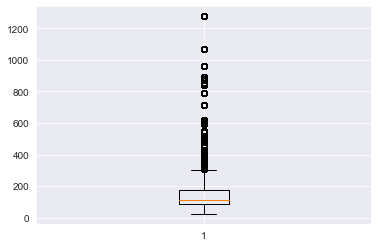

avg_qnt_cust


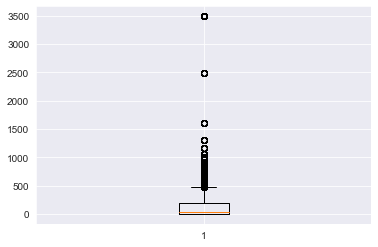

campaign_id


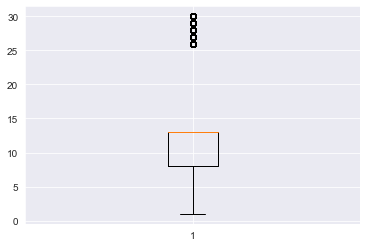

avg_order_qnt


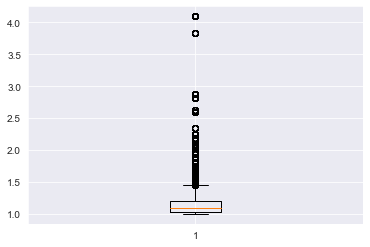

sum_price_cust


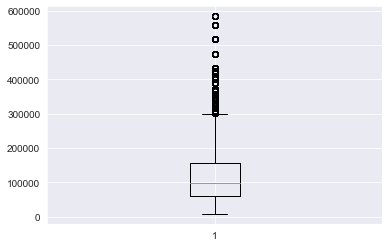

ct_cat


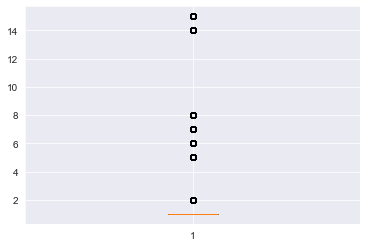

avg_oth_disc_cust


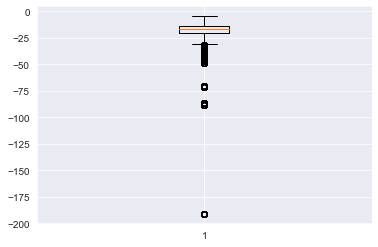

rented


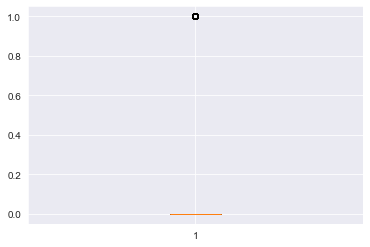

duration_days


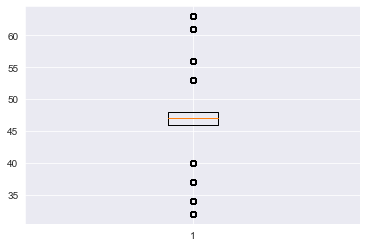

avg_cp_dis


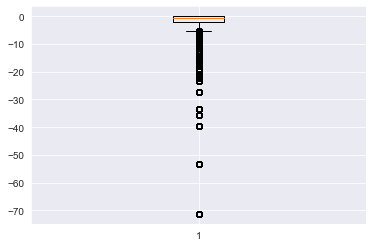

id


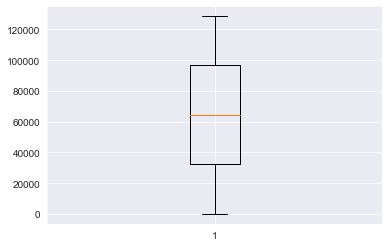

avg_oth_dis


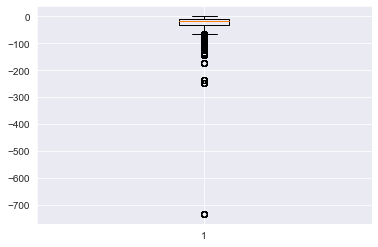

avg_cp_use_cust


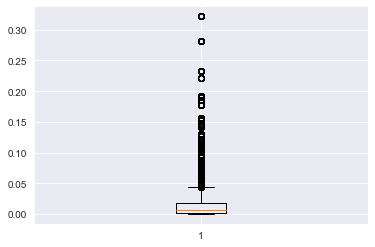

customer_id


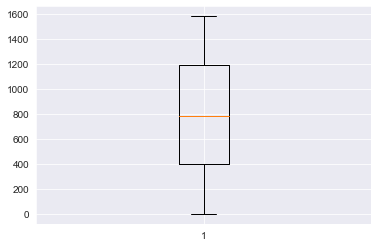

ct_brands


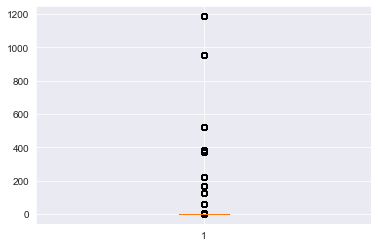

sum_cp_used


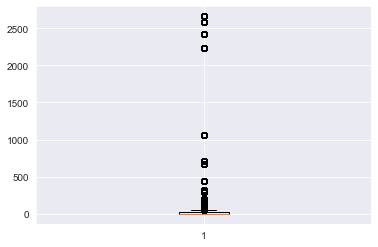

income_bracket


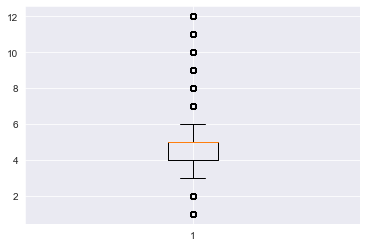

coupon_id


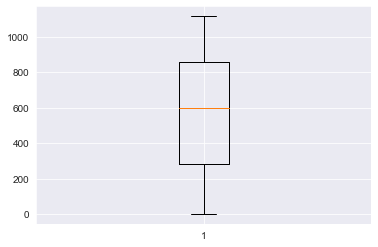

avg_price_cust


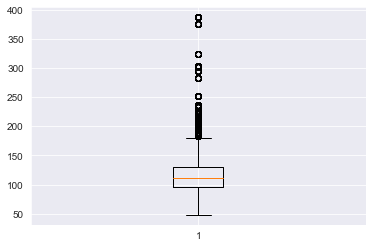

campaign_type_Y


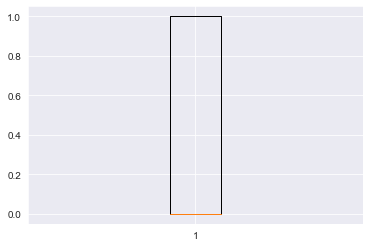

no_of_children_1


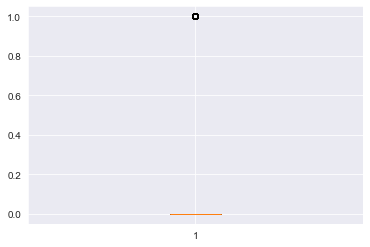

no_of_children_2


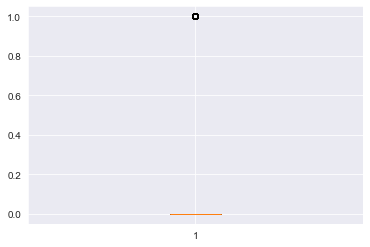

no_of_children_3+


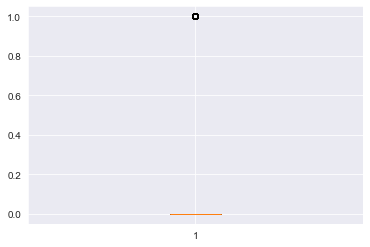

brand_type_Established


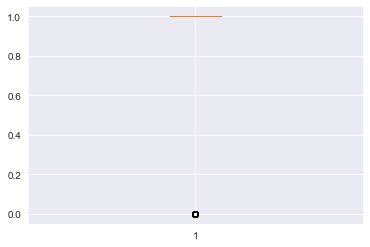

mode_cat_Dairy, Juices & Snacks


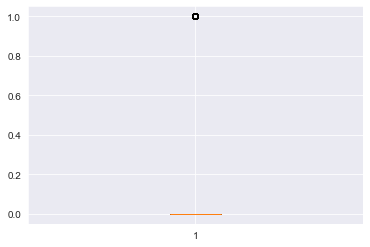

mode_cat_Flowers & Plants


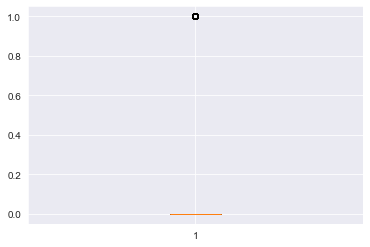

mode_cat_Grocery


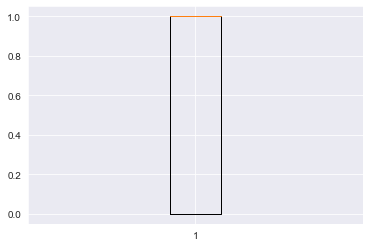

mode_cat_Meat


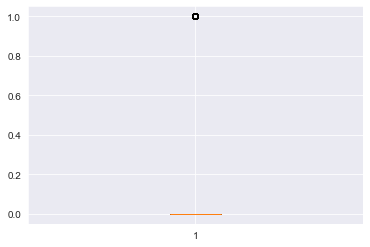

mode_cat_Natural Products


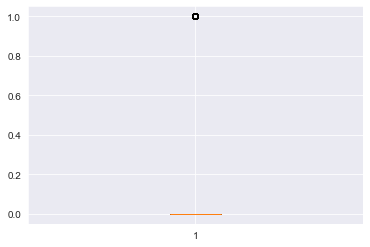

mode_cat_Packaged Meat


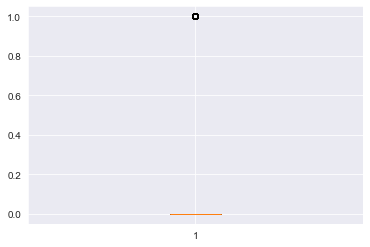

mode_cat_Prepared Food


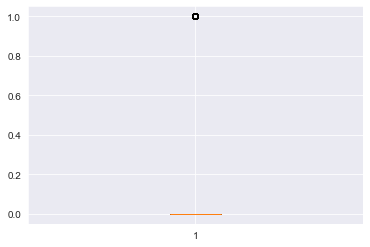

mode_cat_Seafood


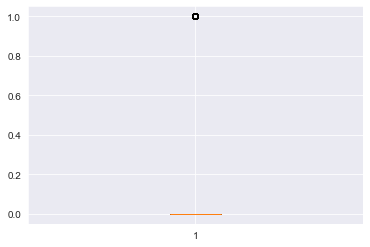

mode_cat_Skin & Hair Care


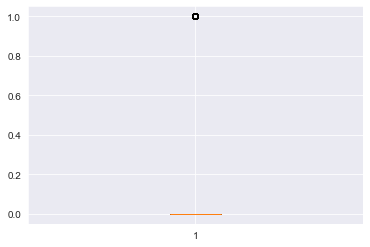

family_size_2


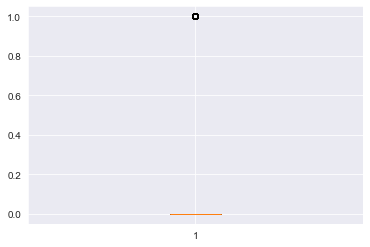

age_range_18-25


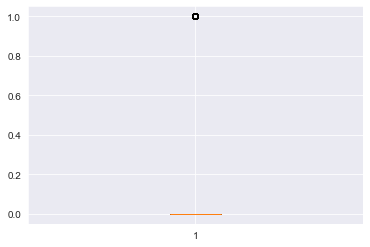

age_range_26-35


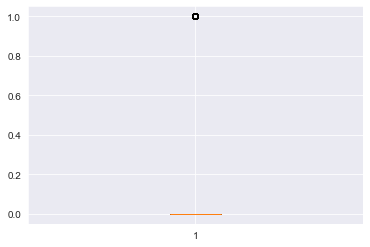

age_range_36-45


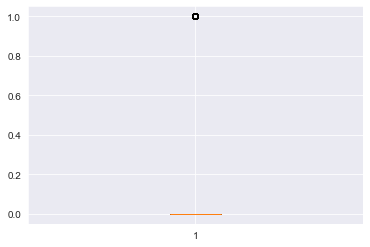

age_range_46-55


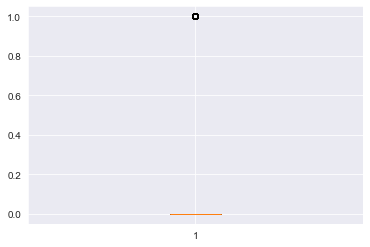

age_range_56-70


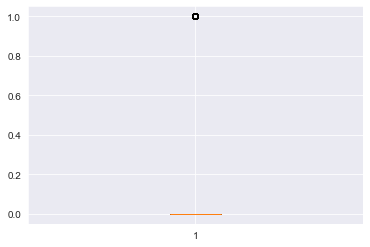

age_range_70+


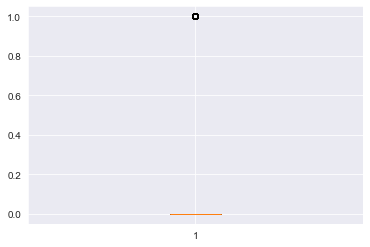

marital_status_Married


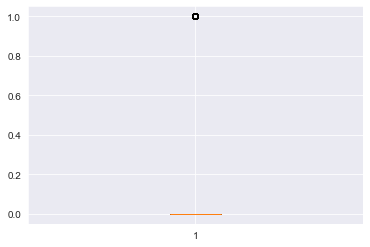

marital_status_Single


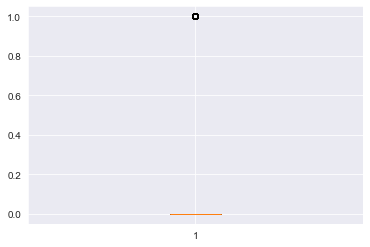

In [224]:
for col in X_reduced.columns:
    print(col)
    plt.boxplot(X_reduced[col])
    plt.show()

Filter out continuous variables by getting variables that has more than 30 unique values. 

In [233]:
cont_ft =[]
for col in X_reduced.columns:
    if len(X_reduced[col].unique())>30:
        cont_ft.append(col)

In [234]:
cont_ft

['avg_price',
 'avg_qnt_cust',
 'avg_order_qnt',
 'sum_price_cust',
 'avg_oth_disc_cust',
 'avg_cp_dis',
 'id',
 'avg_oth_dis',
 'avg_cp_use_cust',
 'customer_id',
 'sum_cp_used',
 'coupon_id',
 'avg_price_cust']

In [235]:
cont_ft.remove('id')
cont_ft.remove('customer_id')
cont_ft.remove('coupon_id')

We remove `id` columns as it does not make a sense to remove anything from that columns

In [236]:
X_cont = X_reduced[cont_ft]

avg_price


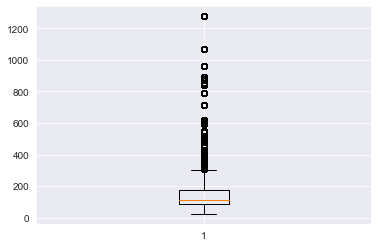

avg_qnt_cust


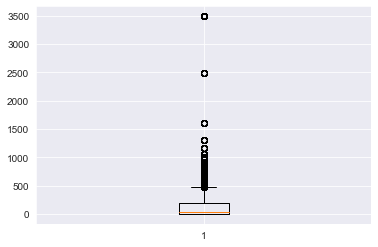

avg_order_qnt


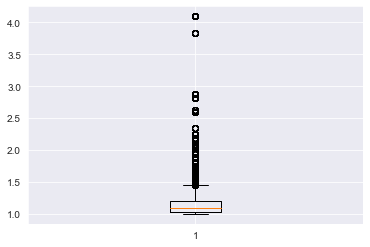

sum_price_cust


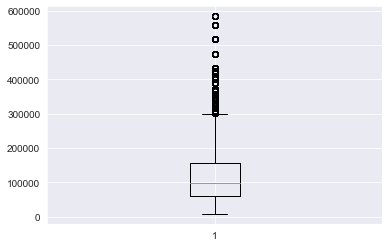

avg_oth_disc_cust


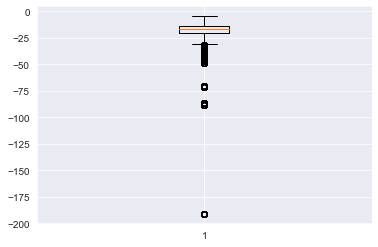

avg_cp_dis


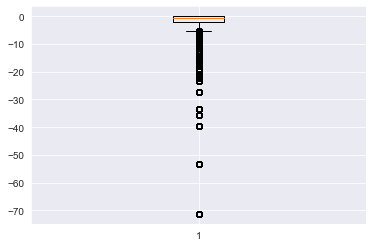

avg_oth_dis


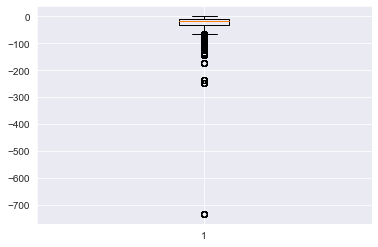

avg_cp_use_cust


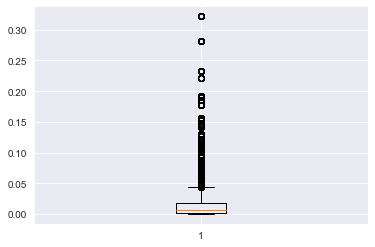

sum_cp_used


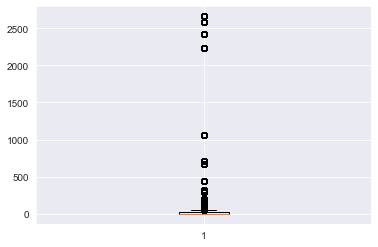

avg_price_cust


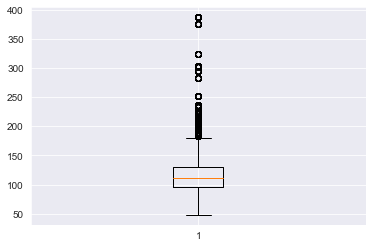

In [237]:
for col in X_cont.columns:
    print(col)
    plt.boxplot(X_cont[col])
    plt.show()

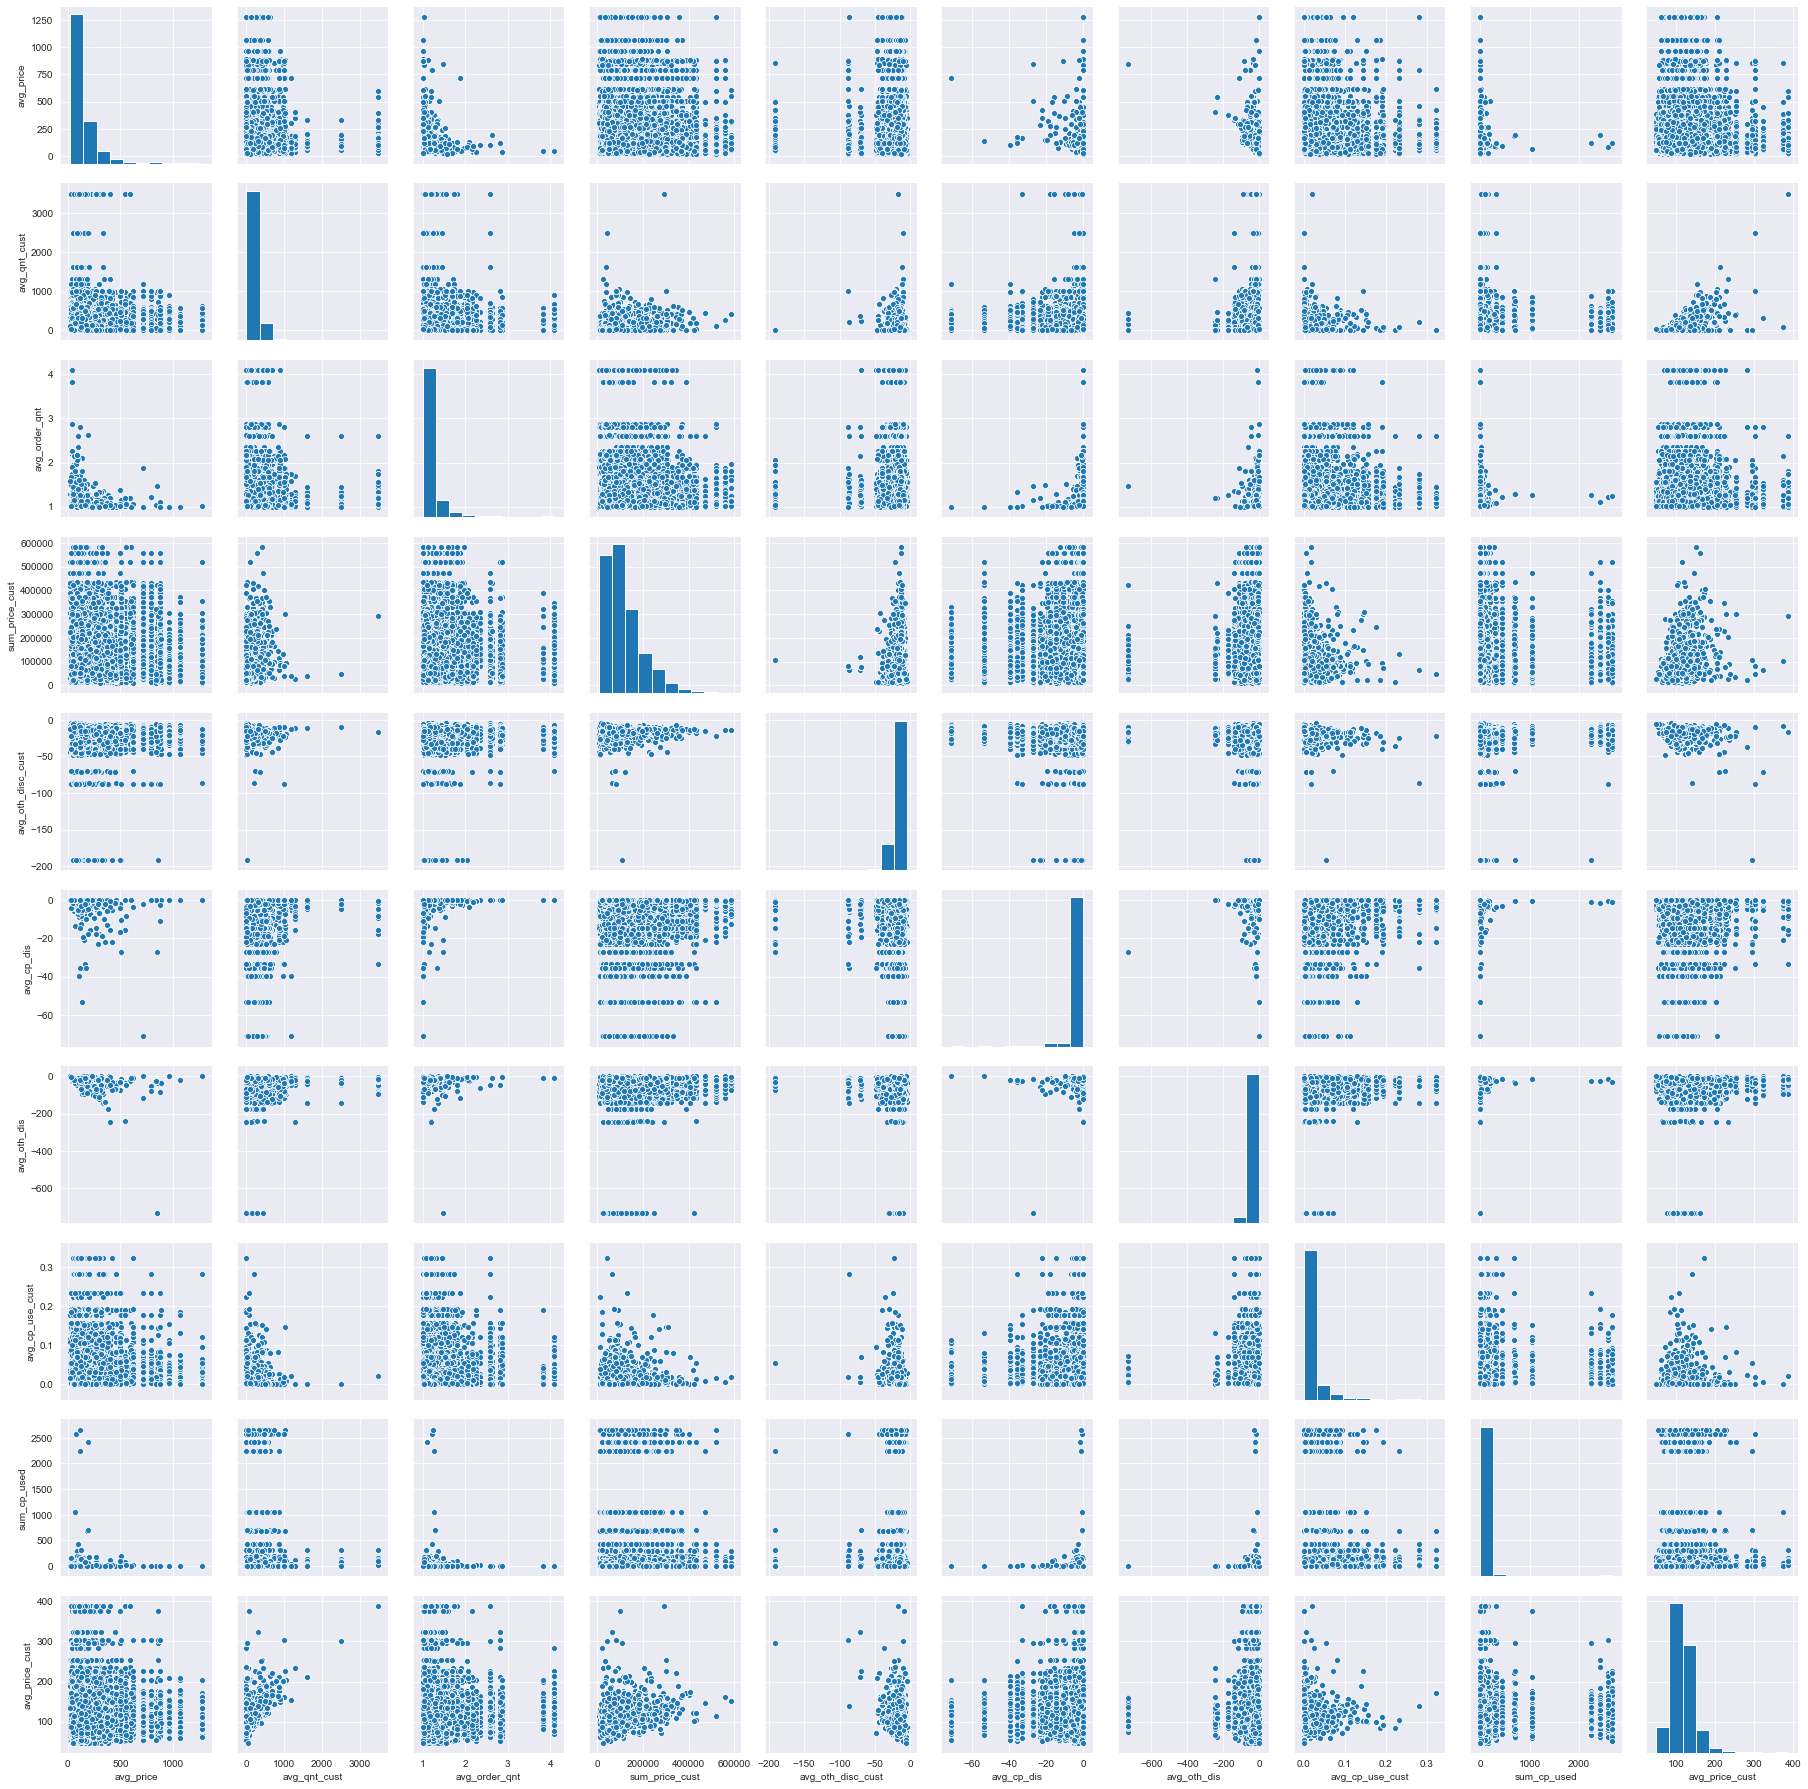

In [238]:
sns.pairplot(X_cont)

avg_price
99 percentile: 854.52


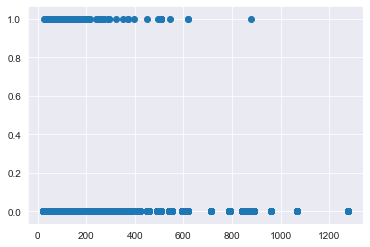

avg_qnt_cust
99 percentile: 831.1561085972851


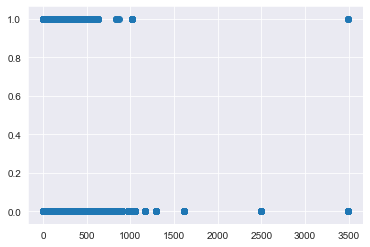

avg_order_qnt
99 percentile: 2.3494669509594885


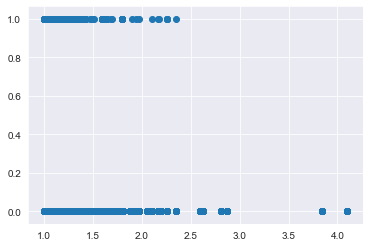

sum_price_cust
99 percentile: 405811.06999999844


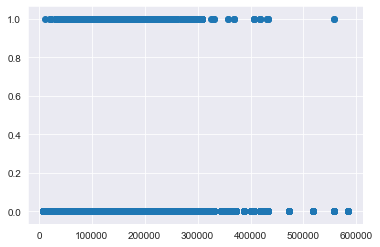

avg_oth_disc_cust
99 percentile: -7.614386716657745


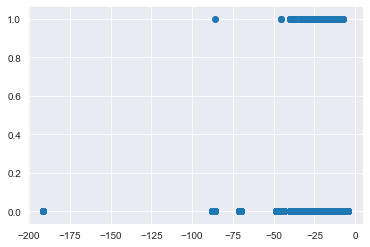

avg_cp_dis
99 percentile: 0.0


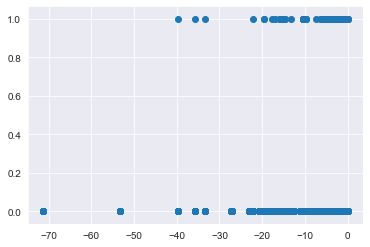

avg_oth_dis
99 percentile: 0.0


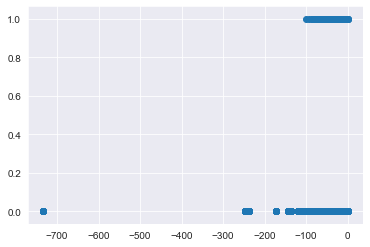

avg_cp_use_cust
99 percentile: 0.15269461077844312


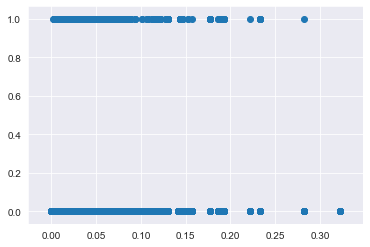

sum_cp_used
99 percentile: 677.0


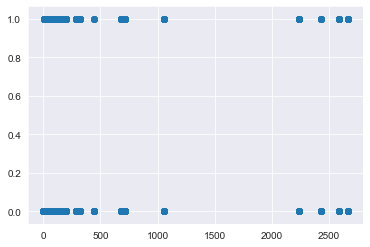

avg_price_cust
99 percentile: 222.33118048780477


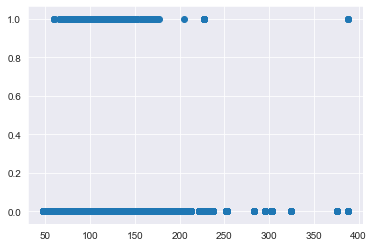

In [239]:
for col in X_cont.columns:
    print(col)
    print('99 percentile:',X_cont[col].quantile(0.99))
    plt.scatter(X_cont[col],y)
    plt.show()

Divide `X_cont` into two groups based on the coupon redemption.

In [240]:
redeemed = X_cont.iloc[y[y==1].index]
redeemed0 = X_cont.iloc[y[y==0].index]

In [241]:
def num_of_outliers(col,value, over=True):
    if over:# quantify the portion above the input value
        print('redeemed:', sum(redeemed[col]>value))
        print('Not redeemed:', sum(redeemed0[col]>value))
        print('Total:', sum(X_cont[col]>value),'which is ', round(sum(X_cont[col]>value)/len(X_cont)*100,2),'%')
    else:
        print('redeemed:', sum(redeemed[col]<value))
        print('Not redeemed:', sum(redeemed0[col]<value))
        print('Total:', sum(X_cont[col]<value),'which is ', round(sum(X_cont[col]<value)/len(X_cont)*100,3),'%')

In [242]:
num_of_outliers('avg_price_cust', 350)

redeemed: 4
Not redeemed: 154
Total: 158 which is  0.2 %


In [243]:
num_of_outliers('avg_qnt_cust', 1500)

redeemed: 4
Not redeemed: 140
Total: 144 which is  0.18 %


In [244]:
X_cont[(X_cont.avg_price_cust>350)&(X_cont.avg_qnt_cust>1500)]

,avg_price,avg_qnt_cust,avg_order_qnt,sum_price_cust,avg_oth_disc_cust,avg_cp_dis,avg_oth_dis,avg_cp_use_cust,sum_cp_used,avg_price_cust
1036,96.963596,3490.058667,1.084111,290788.44,-16.68652,-0.880540,-29.136094,0.02,113.0,387.71792
1394,50.035253,3490.058667,1.218106,290788.44,-16.68652,-0.015773,-17.148099,0.02,1.0,387.71792
2043,173.600912,3490.058667,1.014815,290788.44,-16.68652,0.000000,-20.205439,0.02,0.0,387.71792
2553,87.467274,3490.058667,1.057676,290788.44,-16.68652,-0.626785,-24.725039,0.02,11.0,387.71792
3711,162.396966,3490.058667,1.025641,290788.44,-16.68652,-33.305370,-25.979382,0.02,16.0,387.71792
...,...,...,...,...,...,...,...,...,...,...
75997,396.969945,3490.058667,1.034519,290788.44,-16.68652,-15.972486,-25.752305,0.02,118.0,387.71792
76171,84.501162,3490.058667,1.096324,290788.44,-16.68652,-0.670294,-17.698398,0.02,3.0,387.71792
76919,122.521158,3490.058667,1.172133,290788.44,-16.68652,-8.408859,-18.115062,0.02,23.0,387.71792
77496,104.377453,3490.058667,1.056925,290788.44,-16.68652,-1.556142,-20.750270,0.02,25.0,387.71792


In [245]:
redeemed[(redeemed.avg_price_cust>350)&(redeemed.avg_qnt_cust>1500)]

,avg_price,avg_qnt_cust,avg_order_qnt,sum_price_cust,avg_oth_disc_cust,avg_cp_dis,avg_oth_dis,avg_cp_use_cust,sum_cp_used,avg_price_cust
30352,96.963596,3490.058667,1.084111,290788.44,-16.68652,-0.880540,-29.136094,0.02,113.0,387.71792
38987,123.391925,3490.058667,1.022980,290788.44,-16.68652,-3.239522,-66.985439,0.02,136.0,387.71792
61364,100.052354,3490.058667,1.324878,290788.44,-16.68652,-0.745085,-25.606224,0.02,38.0,387.71792
77496,104.377453,3490.058667,1.056925,290788.44,-16.68652,-1.556142,-20.750270,0.02,25.0,387.71792


For the two variables, a big portion of outliers overlap. 

In [246]:
X_outlier =X_reduced.copy() 

In [247]:
X_outlier.drop(X_outlier[X_outlier.avg_price_cust>350].index, inplace = True)

In [248]:
X_outlier.drop(X_outlier[X_outlier.avg_qnt_cust>1500].index, inplace = True)

In [249]:
num_of_outliers('avg_cp_dis',-45,False)

redeemed: 0
Not redeemed: 289
Total: 289 which is  0.369 %


In [250]:
print('0.01 percentile:',X_cont.avg_cp_dis.quantile(0.01))

0.01 percentile: -33.30537007110536


In [251]:
X_outlier.drop(X_outlier[X_outlier.avg_cp_dis<-45].index, inplace = True)

In [252]:
num_of_outliers('avg_cp_use_cust',0.25)

redeemed: 1
Not redeemed: 151
Total: 152 which is  0.19 %


In [253]:
X_outlier.drop(X_outlier[X_outlier.avg_cp_use_cust>0.25].index, inplace = True)

In [254]:
num_of_outliers('sum_price_cust',500000)

redeemed: 2
Not redeemed: 213
Total: 215 which is  0.27 %


In [255]:
X_outlier.drop(X_outlier[X_outlier.sum_price_cust>500000].index, inplace = True)

In [256]:
num_of_outliers('avg_oth_disc_cust',-75,False)

redeemed: 1
Not redeemed: 221
Total: 222 which is  0.283 %


In [257]:
print('0.01 percentile:',X_cont.avg_oth_disc_cust.quantile(0.01))

0.01 percentile: -40.254088397790056


In [258]:
X_outlier.drop(X_outlier[X_outlier.avg_oth_disc_cust<-75].index, inplace = True)

In [259]:
num_of_outliers('avg_order_qnt',3)

redeemed: 0
Not redeemed: 140
Total: 140 which is  0.18 %


In [260]:
X_outlier.drop(X_outlier[X_outlier.avg_order_qnt>3].index, inplace = True)

In [261]:
num_of_outliers('avg_oth_dis',-200,False)

redeemed: 0
Not redeemed: 75
Total: 75 which is  0.096 %


In [262]:
print('0.01 percentile:',X_cont.avg_oth_dis.quantile(0.01))

0.01 percentile: -108.60208333333335


In [263]:
X_outlier.drop(X_outlier[X_outlier.avg_oth_dis<-200].index, inplace = True)

In [264]:
num_of_outliers('sum_cp_used',2500)

redeemed: 25
Not redeemed: 233
Total: 258 which is  0.33 %


`sum_cp_used` is the number of each coupon is  used. It a coupon has the higher value of this variable, it is a very popular coupon among customers so we do not remove the outliers. 

In [265]:
saved_rows = pd.Index(list(set(X_reduced.index)^set(X_outlier.index)))
y_outlier=y.drop(saved_rows)

avg_price
99 percentile: 854.52


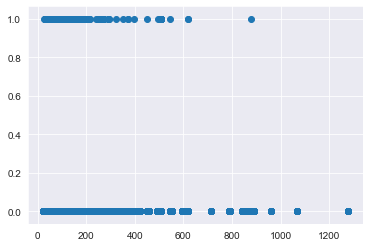

avg_qnt_cust
99 percentile: 726.3654661016949


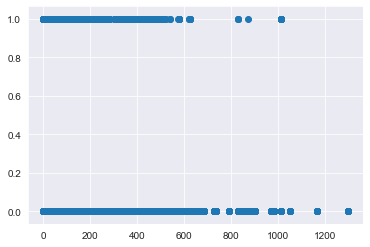

campaign_id
99 percentile: 30.0


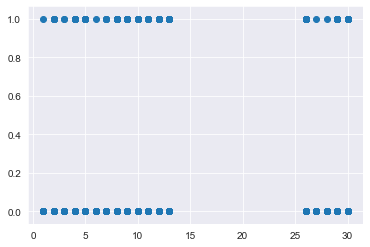

avg_order_qnt
99 percentile: 2.2565670710803034


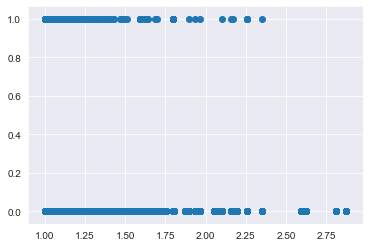

sum_price_cust
99 percentile: 372510.20000000054


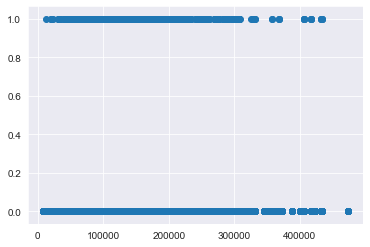

ct_cat
99 percentile: 6.0


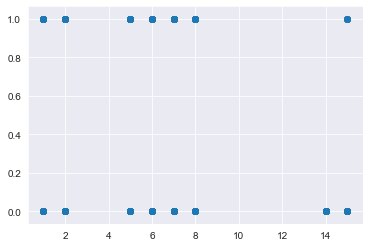

avg_oth_disc_cust
99 percentile: -7.614386716657745


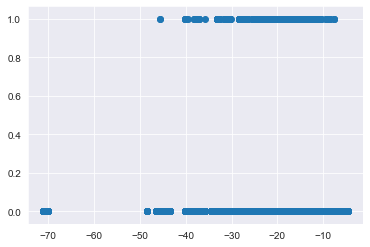

rented
99 percentile: 1.0


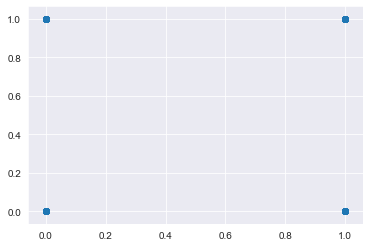

duration_days
99 percentile: 61.0


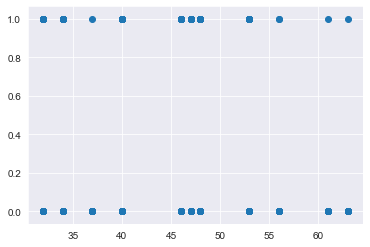

avg_cp_dis
99 percentile: 0.0


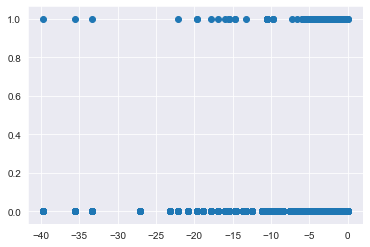

id
99 percentile: 127319.25


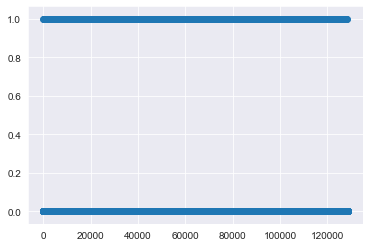

avg_oth_dis
99 percentile: 0.0


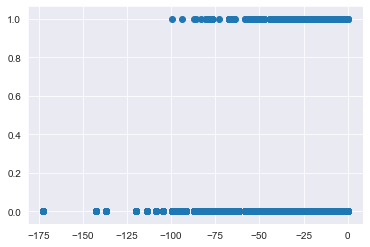

avg_cp_use_cust
99 percentile: 0.1456752655538695


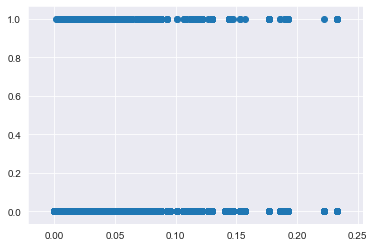

customer_id
99 percentile: 1563.0


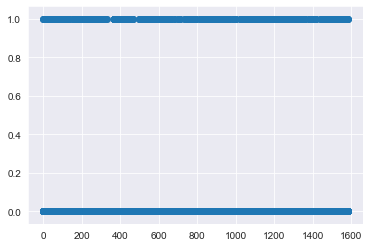

ct_brands
99 percentile: 170.0


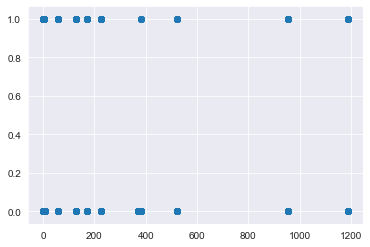

sum_cp_used
99 percentile: 677.0


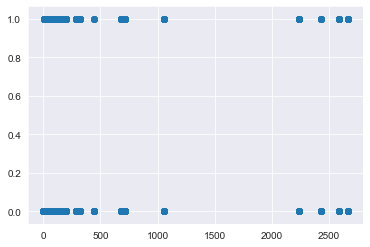

income_bracket
99 percentile: 12.0


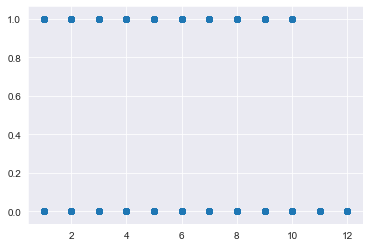

coupon_id
99 percentile: 1103.0


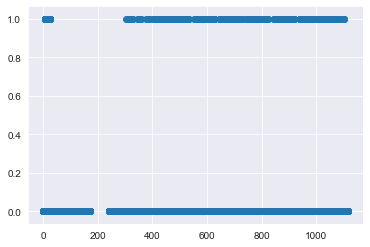

avg_price_cust
99 percentile: 204.9884389782403


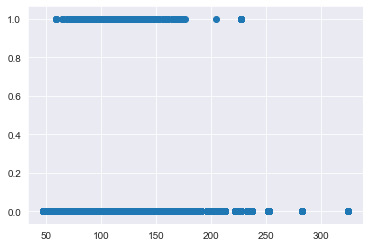

campaign_type_Y
99 percentile: 1.0


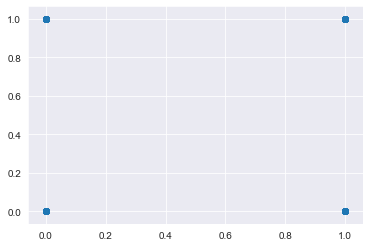

no_of_children_1
99 percentile: 1.0


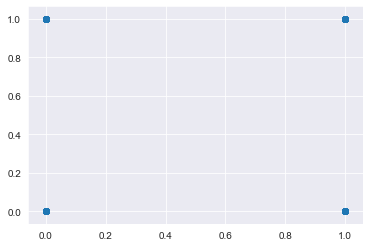

no_of_children_2
99 percentile: 1.0


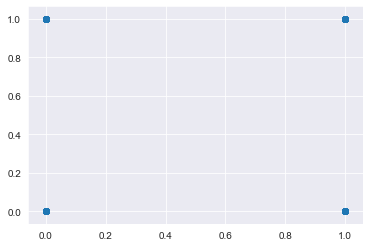

no_of_children_3+
99 percentile: 1.0


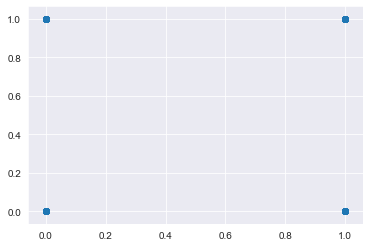

brand_type_Established
99 percentile: 1.0


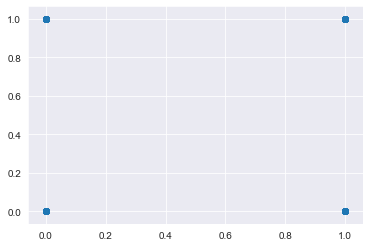

mode_cat_Dairy, Juices & Snacks
99 percentile: 1.0


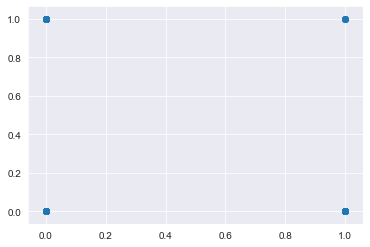

mode_cat_Flowers & Plants
99 percentile: 0.0


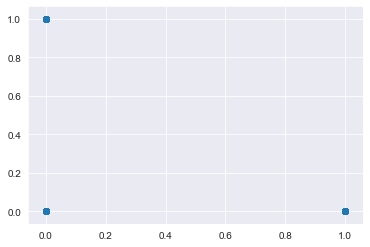

mode_cat_Grocery
99 percentile: 1.0


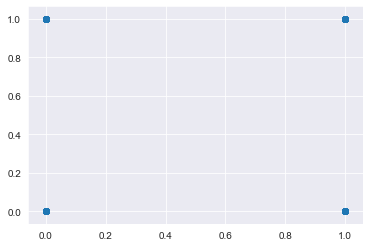

mode_cat_Meat
99 percentile: 0.0


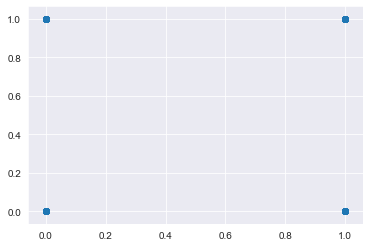

mode_cat_Natural Products
99 percentile: 1.0


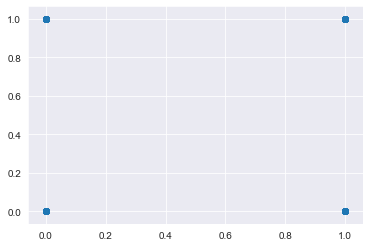

mode_cat_Packaged Meat
99 percentile: 1.0


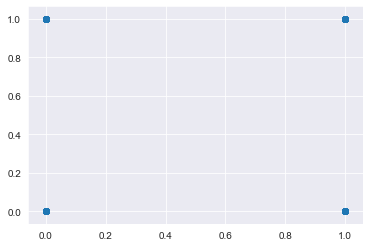

mode_cat_Prepared Food
99 percentile: 1.0


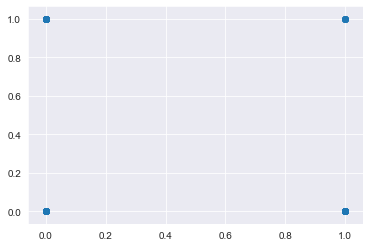

mode_cat_Seafood
99 percentile: 1.0


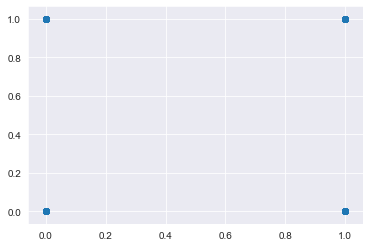

mode_cat_Skin & Hair Care
99 percentile: 0.0


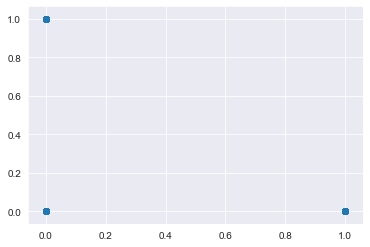

family_size_2
99 percentile: 1.0


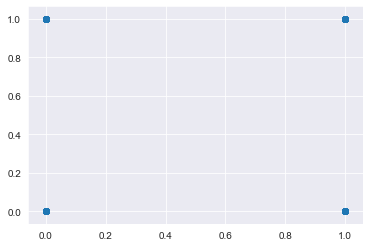

age_range_18-25
99 percentile: 1.0


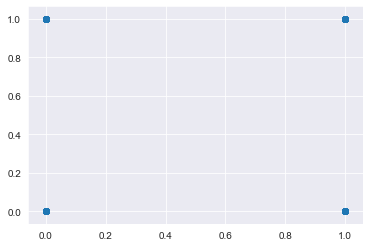

age_range_26-35
99 percentile: 1.0


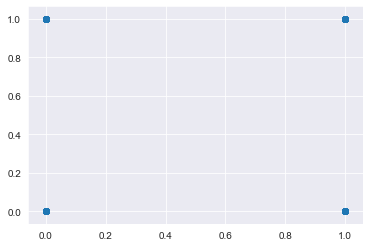

age_range_36-45
99 percentile: 1.0


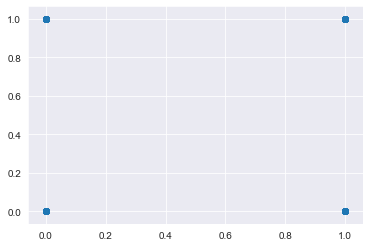

age_range_46-55
99 percentile: 1.0


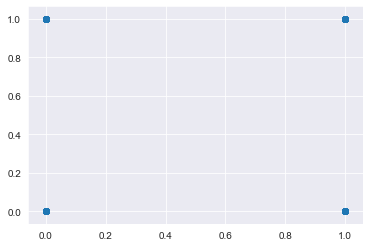

age_range_56-70
99 percentile: 1.0


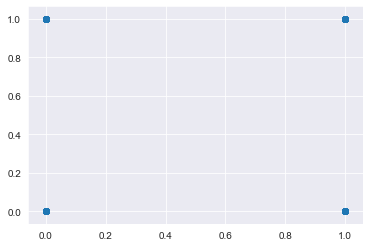

age_range_70+
99 percentile: 1.0


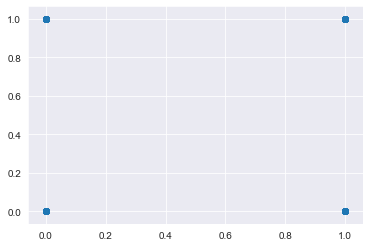

marital_status_Married
99 percentile: 1.0


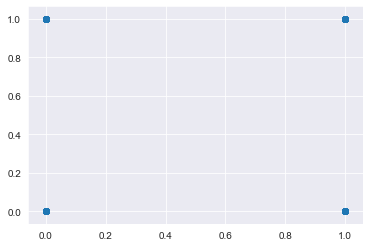

marital_status_Single
99 percentile: 1.0


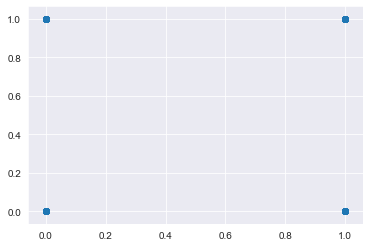

In [266]:
for col in X_outlier.columns:
    print(col)
    print('99 percentile:',X_outlier[col].quantile(0.99))
    plt.scatter(X_outlier[col],y_outlier)
    plt.show()

avg_price


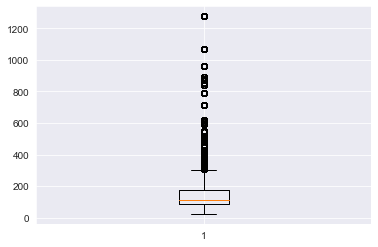

avg_qnt_cust


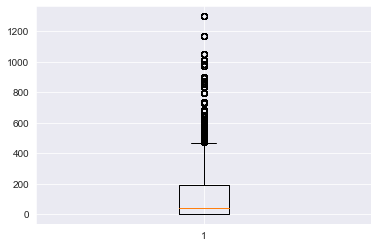

campaign_id


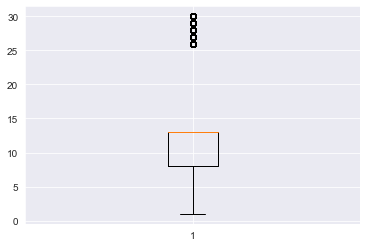

avg_order_qnt


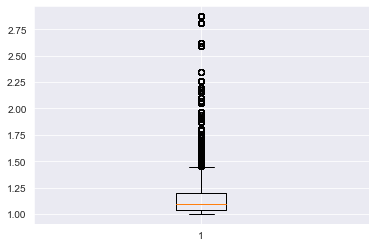

sum_price_cust


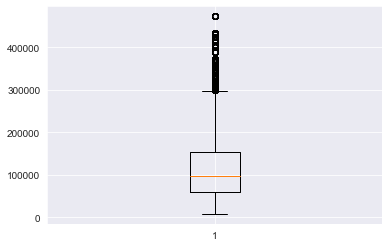

ct_cat


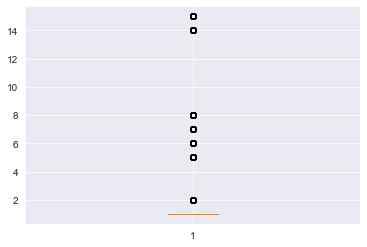

avg_oth_disc_cust


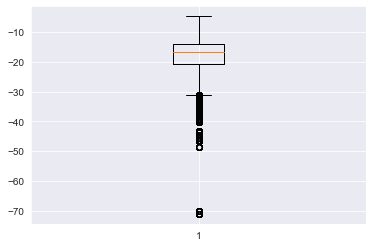

rented


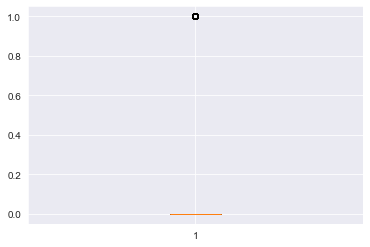

duration_days


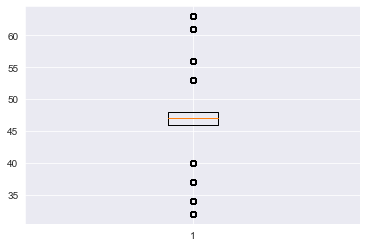

avg_cp_dis


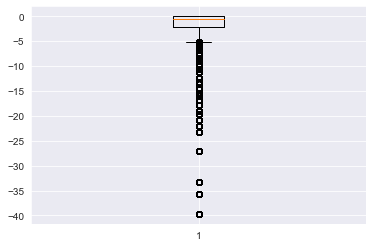

id


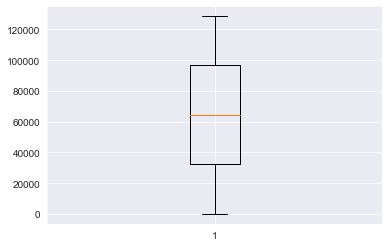

avg_oth_dis


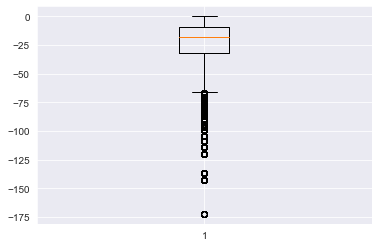

avg_cp_use_cust


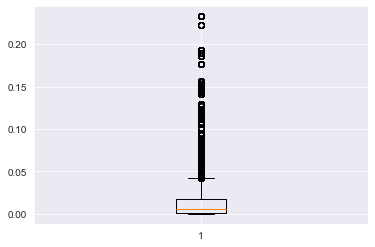

customer_id


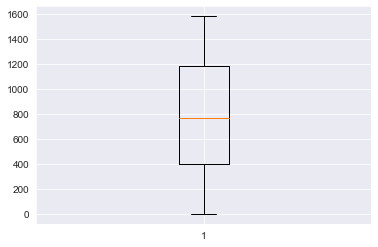

ct_brands


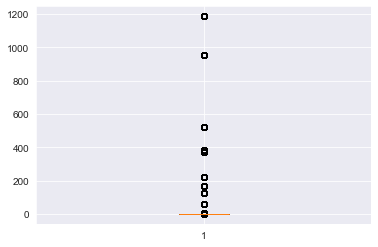

sum_cp_used


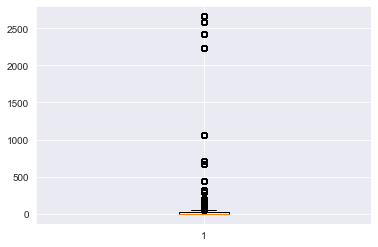

income_bracket


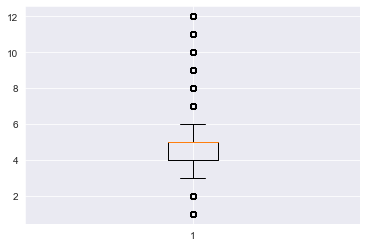

coupon_id


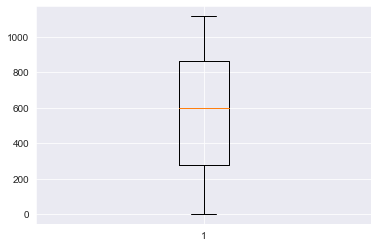

avg_price_cust


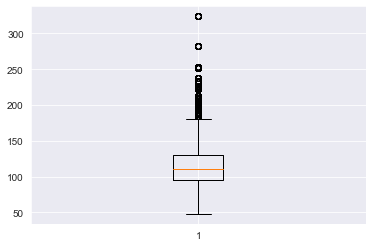

campaign_type_Y


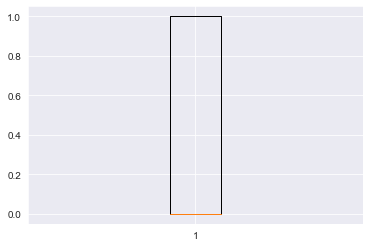

no_of_children_1


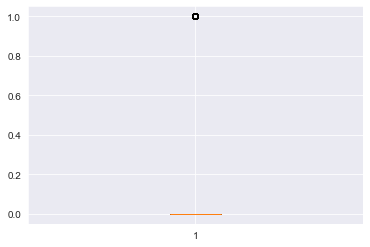

no_of_children_2


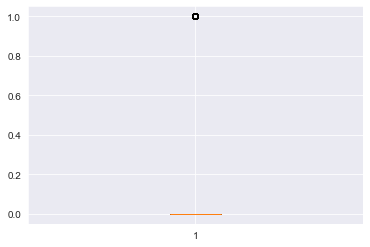

no_of_children_3+


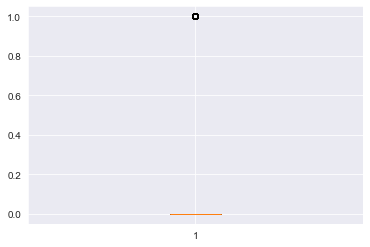

brand_type_Established


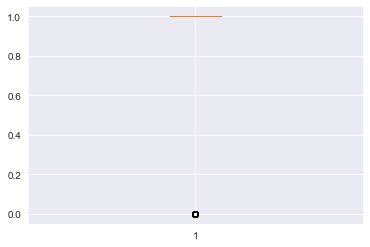

mode_cat_Dairy, Juices & Snacks


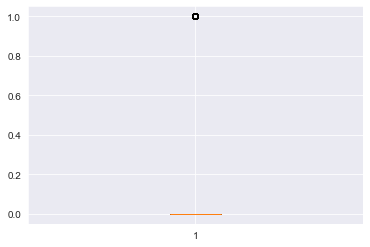

mode_cat_Flowers & Plants


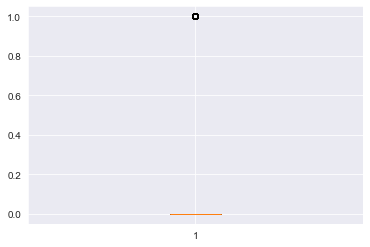

mode_cat_Grocery


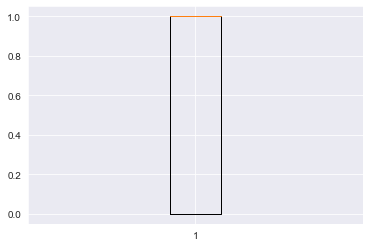

mode_cat_Meat


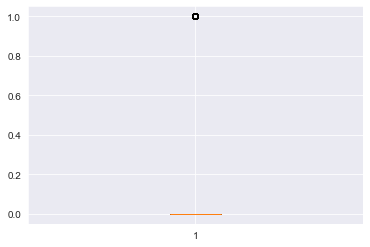

mode_cat_Natural Products


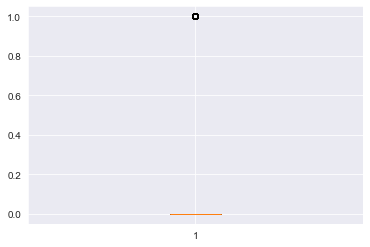

mode_cat_Packaged Meat


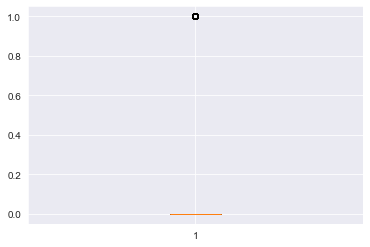

mode_cat_Prepared Food


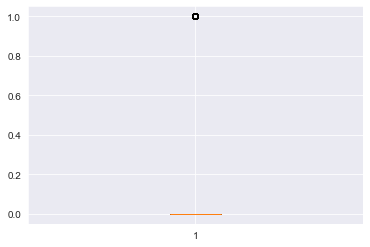

mode_cat_Seafood


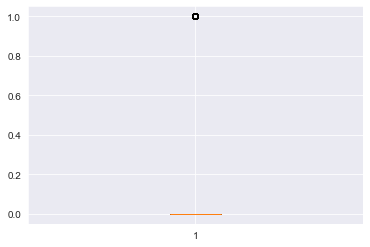

mode_cat_Skin & Hair Care


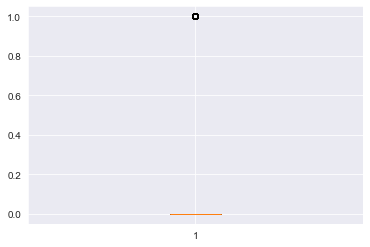

family_size_2


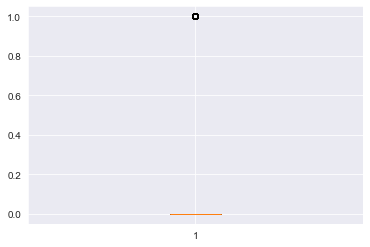

age_range_18-25


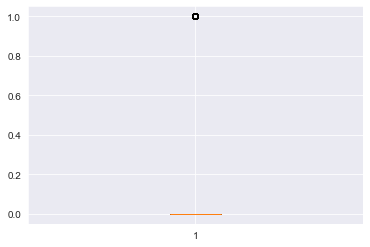

age_range_26-35


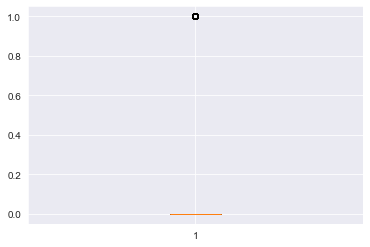

age_range_36-45


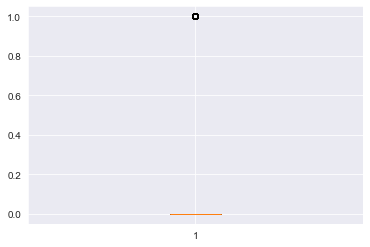

age_range_46-55


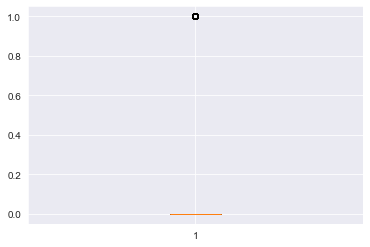

age_range_56-70


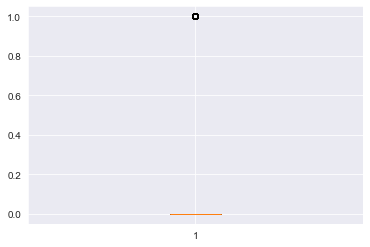

age_range_70+


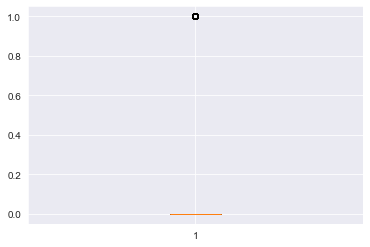

marital_status_Married


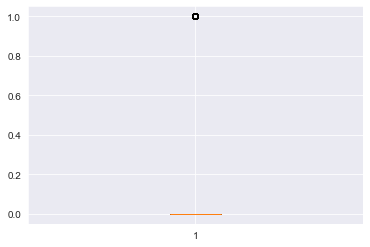

marital_status_Single


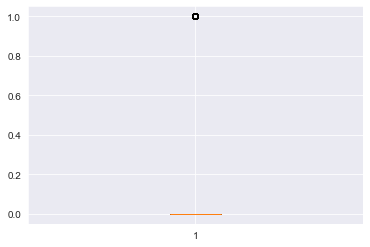

In [267]:
for col in X_outlier.columns:
    print(col)
    plt.boxplot(X_outlier[col])
    plt.show()

In [268]:
print('The removed outliers are ',(len(X_reduced)-len(X_outlier))/len(X_reduced)*100, '% of the original size.')

The removed outliers are  1.5222855976215084 % of the original size.


### Saving data

In [269]:
finals['X_outlier'] = X_outlier

In [270]:
finals['y_outlier']= y_outlier

## Resampling process for class imbalance problems

#### Reassigning X_reduced and y to X_outlier and y_outlier

In [271]:
y_outlier =finals['y_outlier']
X_outlier =finals['X_outlier']

In [272]:
X_reduced = X_outlier
y= y_outlier

In [273]:
y.value_counts(normalize=True)

0    0.990645
1    0.009355
Name: redemption_status, dtype: float64

In [274]:
y.value_counts(normalize=True)[1]/y.value_counts(normalize=True)[0]

0.00944358699348628

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=0)

C:\Users\woogu\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.1: 0.6308288603011487
-------------------------------------------------------------------------------------


C:\Users\woogu\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.25: 0.7345479581298688
-------------------------------------------------------------------------------------


C:\Users\woogu\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.33: 0.7375431897288132
-------------------------------------------------------------------------------------


C:\Users\woogu\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.5: 0.728646743080081
-------------------------------------------------------------------------------------


C:\Users\woogu\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.7: 0.7748517843254751
-------------------------------------------------------------------------------------


C:\Users\woogu\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for even: 0.7749620695370572
-------------------------------------------------------------------------------------


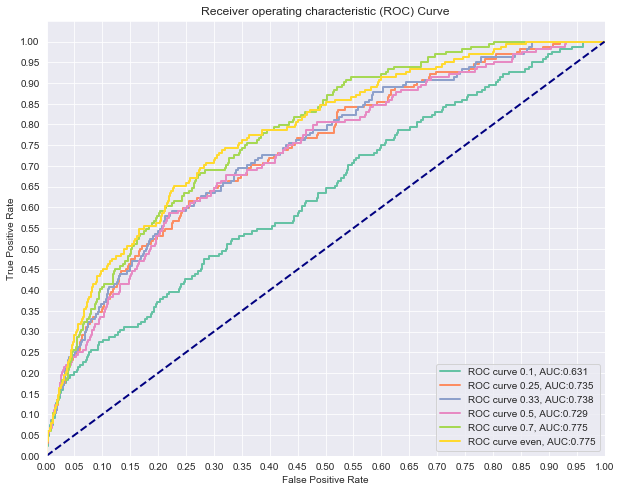

In [276]:
# Now let's compare a few different ratios of minority class to majority class
ratios = [0.1, 0.25, 0.33, 0.5, 0.7, 1]
names = ['0.1', '0.25', '0.33','0.5','0.7','even']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, ratio in enumerate(ratios):
    # Fit a model
    smote = SMOTE(sampling_strategy=ratio)
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver ='lbfgs')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}, AUC:{}'.format(names[n], round(auc(fpr, tpr),3)))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

By comparing the ROC (receiver operating characteristic) curves with varied ratio of minority observations to majority observations, the difference in AUC values between datasets with the ratios 0.5 and 1 is about 4%. So I chose the ratio 0.5. 

In [277]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
SMOTE_ratio=0.33
smote = SMOTE(sampling_strategy=SMOTE_ratio)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    76454
1      722
Name: redemption_status, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

0    57324
1    18916
Name: redemption_status, dtype: int64


In [278]:
from imblearn.over_sampling import SMOTE
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
SMOTE_ratio=0.33
smote = SMOTE(sampling_strategy=SMOTE_ratio)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

0    76454
1      722
Name: redemption_status, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

0    57324
1    18916
Name: redemption_status, dtype: int64


#### Save the data 

In [279]:
finals.keys()

dict_keys(['train_final', 'X', 'y', 'X_reduced', 'removed_cols', 'X_outlier', 'y_outlier'])

In [280]:
finals['SMOTE_ratio']=0.33
finals['X_train_resampled']=X_train_resampled
finals['y_train_resampled']=y_train_resampled

finals['X_test'] = X_test
finals['y_test'] = y_test



## Normalizing data

In [281]:
scaler = StandardScaler()
scaled_X_train_resampled = scaler.fit_transform(X_train_resampled)
scaled_X_test = scaler.transform(X_test)

In [282]:
scaled_X_train_resampled = pd.DataFrame(scaled_X_train_resampled, columns = X_train_resampled.columns)
scaled_X_test = pd.DataFrame(scaled_X_test, columns = X_train_resampled.columns)

In [283]:
scaled_X_train_resampled.head()

,avg_price,avg_qnt_cust,campaign_id,avg_order_qnt,sum_price_cust,ct_cat,avg_oth_disc_cust,rented,duration_days,avg_cp_dis,...,mode_cat_Skin & Hair Care,family_size_2,age_range_18-25,age_range_26-35,age_range_36-45,age_range_46-55,age_range_56-70,age_range_70+,marital_status_Married,marital_status_Single
0,-0.266896,-0.779351,-0.220596,-0.385545,0.271475,-0.210971,1.495767,-0.19004,-2.254860,0.447022,...,-0.056895,-0.498175,-0.158396,-0.312654,-0.376558,2.201811,-0.209278,-0.182253,-0.545459,-0.268424
1,-0.210458,0.885292,-0.755958,-0.657827,-1.104147,-0.210971,-1.171834,-0.19004,0.545026,-2.989800,...,-0.056895,-0.498175,-0.158396,-0.312654,-0.376558,-0.454172,-0.209278,-0.182253,-0.545459,-0.268424
2,-0.465515,-0.281691,-0.086756,0.050348,1.376453,-0.210971,0.875476,-0.19004,0.370033,0.497208,...,-0.056895,2.007325,-0.158396,3.198426,-0.376558,-0.454172,-0.209278,-0.182253,1.833319,-0.268424
3,-0.299500,-0.779424,-0.755958,1.557183,-0.404139,-0.210971,1.158770,-0.19004,0.545026,-1.648239,...,-0.056895,-0.498175,-0.158396,-0.312654,-0.376558,-0.454172,-0.209278,-0.182253,-0.545459,-0.268424
4,-0.890693,-0.560409,-0.086756,-0.252545,0.726966,-0.210971,0.472475,-0.19004,0.370033,0.307199,...,-0.056895,-0.498175,-0.158396,-0.312654,-0.376558,-0.454172,-0.209278,-0.182253,-0.545459,-0.268424


In [284]:
finals['scaled_X_train_resampled']=scaled_X_train_resampled
finals['scaled_X_test']=scaled_X_test

## Exploratory Data Analysis 

* histogram

* correlation with target

* heat map with correlation matrix

In [285]:
corr_y =[]
for col in X_outlier.columns:
    
    corr = np.corrcoef(y, X_outlier[col])[0][1]
    corr_y.append((col,corr))
    if abs(corr)>0.05: 
        print(col)
        print('correlation coefficient:', corr)    

sum_price_cust
correlation coefficient: 0.055213653928030675
ct_cat
correlation coefficient: 0.05515775719449943
avg_cp_use_cust
correlation coefficient: 0.13503818635072506
sum_cp_used
correlation coefficient: 0.09157930014870368


In [286]:
X_outlier.columns

Index(['avg_price', 'avg_qnt_cust', 'campaign_id', 'avg_order_qnt',
       'sum_price_cust', 'ct_cat', 'avg_oth_disc_cust', 'rented',
       'duration_days', 'avg_cp_dis', 'id', 'avg_oth_dis', 'avg_cp_use_cust',
       'customer_id', 'ct_brands', 'sum_cp_used', 'income_bracket',
       'coupon_id', 'avg_price_cust', 'campaign_type_Y', 'no_of_children_1',
       'no_of_children_2', 'no_of_children_3+', 'brand_type_Established',
       'mode_cat_Dairy, Juices & Snacks', 'mode_cat_Flowers & Plants',
       'mode_cat_Grocery', 'mode_cat_Meat', 'mode_cat_Natural Products',
       'mode_cat_Packaged Meat', 'mode_cat_Prepared Food', 'mode_cat_Seafood',
       'mode_cat_Skin & Hair Care', 'family_size_2', 'age_range_18-25',
       'age_range_26-35', 'age_range_36-45', 'age_range_46-55',
       'age_range_56-70', 'age_range_70+', 'marital_status_Married',
       'marital_status_Single'],
      dtype='object')

Text(0.5, 0.98, 'Number Of Coupon Usages By Each Customers')

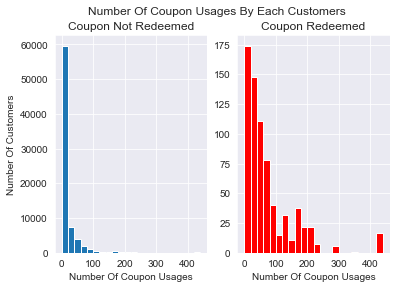

In [287]:
redeemed = X.loc[y_outlier[y_outlier==1].index]
redeemed0 = X.loc[y_outlier[y_outlier==0].index]

red1 = redeemed.ct_cp_use_cust
red0= redeemed0.ct_cp_use_cust

plt.suptitle('number of coupon usages by each customers'.title())
ax1 = plt.subplot(121)
ax1.hist(red0,list(range(0,460,20)))
ax1.set_title('Coupon not redeemed'.title())
ax1.set_ylabel('number of customers'.title())
ax1.set_xlabel('number of coupon usages'.title())
ax2 = plt.subplot(122)
ax2.hist(red1,list(range(0,460,20)), color='red')
ax2.set_title('Coupon redeemed'.title())
ax2.set_xlabel('number of coupon usages'.title())
plt.suptitle('number of coupon usages by each customers'.title())

Customers who used coupons many times before are more likely to redeem coupons.  

Text(0.5, 0, 'Number Of Usages')

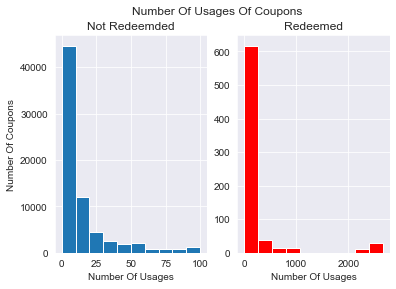

In [288]:
bins = list(range(0, 110,10))
cp_use1 = redeemed.sum_cp_used
cp_use0=redeemed0.sum_cp_used

plt.suptitle('Number of usages of coupons'.title())
ax1 = plt.subplot(121) 
ax1.hist(cp_use0,bins)
ax1.set_title('Not redeemded'.title())
ax1.set_xlabel('number of usages'.title())
ax1.set_ylabel('number of coupons'.title())

ax2 = plt.subplot(122)
ax2.hist(cp_use1, color='red')
ax2.set_title('Redeemed')
ax2.set_xlabel('number of usages'.title())
# ax2.set_ylabel('number of coupons'.title())


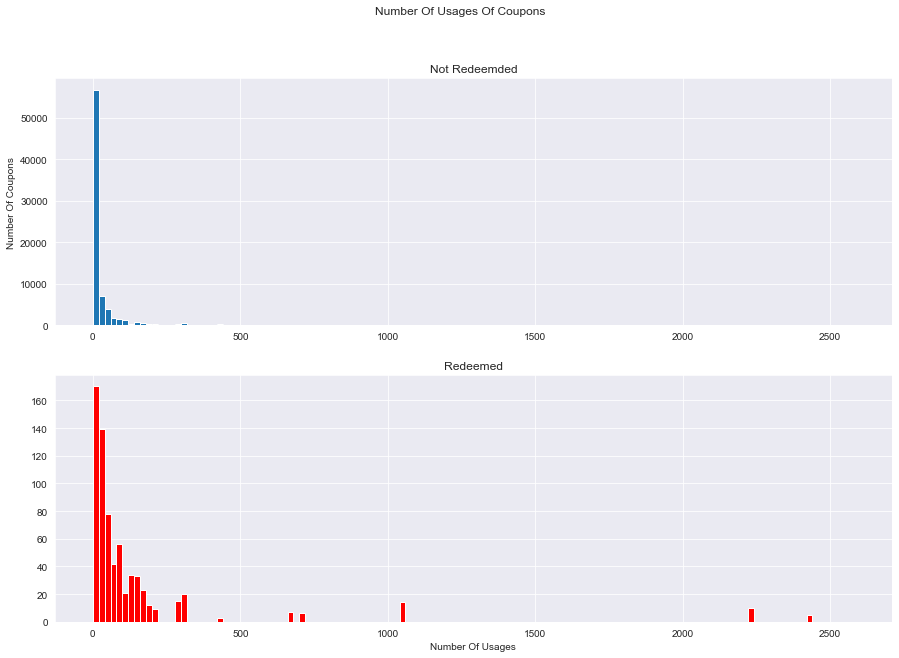

In [289]:
fig = plt.figure(figsize=(15,10))

cp_use1 = redeemed.sum_cp_used
cp_use0=redeemed0.sum_cp_used

plt.suptitle('Number of usages of coupons'.title())
ax1 = plt.subplot(211)
ax1.hist(cp_use0, list(range(0,2600,20)))
ax1.set_title('Not redeemded'.title())
# ax1.set_xlabel('number of usages'.title())
ax1.set_ylabel('number of coupons'.title())

ax2 = plt.subplot(212)
ax2.hist(cp_use1, list(range(0,2600,20)),color='red')
ax2.set_title('Redeemed')
ax2.set_xlabel('number of usages'.title())
plt.show();

Coupons that had used many times are likely to get redeemed again.  

Text(0.5, 1.0, 'Number Of Items In Each Brand Type')

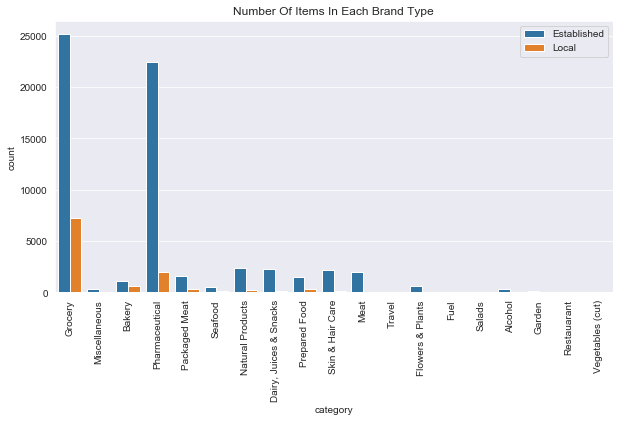

In [290]:
fig = plt.figure(figsize = (10,5))
ax = sns.countplot(x="category", hue='brand_type', data =trans_item )
ax.set_xticklabels(trans_item.category.unique(), rotation=90)
ax.legend(loc ='upper right')
ax.set_title('number of items in each brand type'.title())

There is a larger variety of established brand type products in every category than local products.  

# Saving data

### Final processed data

In [292]:
tables.keys()

dict_keys(['train', 'campaign', 'coupon', 'demog', 'transaction', 'item', 'transaction1', 'trans_item', 'cp_trans_item', 'cp_trans_item1', 'train_cp_trans_item', 'test_cp_trans_item', 'cust_trans', 'train_cp_trans_item_cust', 'train_cp_trans_item_cust_camp'])

Following is to save `tables` and `finals`. I renamed the file names with suffix `_new` just in case you want to keep my original pickle file separate from yours.  

In [ ]:
import pickle
pickle.dump(tables, open("tables_new.p","wb"))

In [ ]:
tables.keys()

In [ ]:
finals.keys()

In [ ]:
import pickle
pickle.dump(finals, open("finals_new.p","wb"))